In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Load your Excel file into a Pandas DataFrame
df = pd.read_excel('data.xlsx')

print(df.head(10))

print(df.columns)

print(df.shape)

                                               blurb  \
0  Fun, dynamic, & portable synth! The Pocket Pia...   
1  LED lit and beautifully designed, these cables...   
2  Create new sound universes inspired from the r...   
3  Bass Drum, Snare Drum, Hi Hats (and more!) ins...   
4  Turns anything into a speaker / Portable & lig...   
5  The expressive keyboard and intuitive app to p...   
6  Solve your Sync Issues Effortlessly with this ...   
7  Supports DSD512,PCM32Bit/768kHz,MQA16X, LDAC,A...   
8  A really nice, versatile hi-gain distortion th...   
9  Powerful hi-fi speaker, guitar amp, PA system,...   

   converted_pledged_amount country_displayable_name          Created At  \
0                    116567        the United States 2022-10-23 03:46:22   
1                     62663                  Ireland 2022-10-04 14:02:25   
2                    232133                   France 2022-08-23 12:20:47   
3                     13939                   France 2020-03-26 15:30:58   
4  

In [3]:
# Check for duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [blurb, converted_pledged_amount, country_displayable_name, Created At, creator, deadline, goal, Launced At, location, name, photo, profile, source_url, spotlight, staff_pick, state, State Changed at, Category, Creator, City, Multiple Projects, goal_converted_to_USD, Deficit/Surplus, Days Elapsed between deadline and launch, Days Elapsed between Launch and Creation, External URL, External URL Present, urls]
Index: []

[0 rows x 28 columns]


In [4]:
# Check for null values in the entire DataFrame
# null_values = df.isnull()
print(df.isnull().sum().sum())

null_counts = df.isnull().sum()
print(null_counts)



16479
blurb                                           0
converted_pledged_amount                        0
country_displayable_name                        0
Created At                                      0
creator                                         0
deadline                                        0
goal                                            0
Launced At                                      0
location                                       25
name                                            1
photo                                           0
profile                                         0
source_url                                      0
spotlight                                       0
staff_pick                                      0
state                                           0
State Changed at                                0
Category                                        0
Creator                                         0
City                                        

In [5]:
df_filled = df.fillna(0)
print(df_filled.head(10))

                                               blurb  \
0  Fun, dynamic, & portable synth! The Pocket Pia...   
1  LED lit and beautifully designed, these cables...   
2  Create new sound universes inspired from the r...   
3  Bass Drum, Snare Drum, Hi Hats (and more!) ins...   
4  Turns anything into a speaker / Portable & lig...   
5  The expressive keyboard and intuitive app to p...   
6  Solve your Sync Issues Effortlessly with this ...   
7  Supports DSD512,PCM32Bit/768kHz,MQA16X, LDAC,A...   
8  A really nice, versatile hi-gain distortion th...   
9  Powerful hi-fi speaker, guitar amp, PA system,...   

   converted_pledged_amount country_displayable_name          Created At  \
0                    116567        the United States 2022-10-23 03:46:22   
1                     62663                  Ireland 2022-10-04 14:02:25   
2                    232133                   France 2022-08-23 12:20:47   
3                     13939                   France 2020-03-26 15:30:58   
4  

In [6]:
print(df_filled.isnull().sum().sum())


0


In [7]:
df_filled.describe()

,converted_pledged_amount,goal,goal_converted_to_USD,Deficit/Surplus,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation
count,2.195600e+04,2.195600e+04,2.195600e+04,2.195600e+04,21956.000000,21956.000000
mean,4.556036e+04,1.155916e+05,7.163082e+04,-2.607045e+04,36.014789,65.372606
std,2.199772e+05,1.576724e+06,1.165456e+06,1.185539e+06,12.101239,147.094068
min,0.000000e+00,1.000000e+00,7.529327e-01,-8.740938e+07,1.000000,0.005509
25%,1.180000e+02,5.000000e+03,5.000000e+03,-1.999900e+04,30.000000,7.010466
50%,2.593500e+03,1.500000e+04,1.278323e+04,-1.129870e+03,30.000000,21.113773
75%,2.095500e+04,5.000000e+04,4.000000e+04,5.223155e+03,43.260231,59.257462
max,1.217965e+07,1.000000e+08,8.740938e+07,1.207965e+07,90.041667,2854.713600


In [8]:
selected_columns = [
    'blurb', 'country_displayable_name', 'name', 'spotlight', 'staff_pick',
    'Category', 'state' , 'Multiple Projects', 'goal_converted_to_USD',
    'Days Elapsed between deadline and launch', 'Days Elapsed between Launch and Creation' 
]

In [9]:
X = df_filled[selected_columns]  # Predictors
y = df_filled['converted_pledged_amount']  # Target variable

In [10]:
# Convert the blurb column into word count
X['blurb'] = X['blurb'].apply(lambda x: len(x.split()))

# Convert the name column into string type
X['name'] = X['name'].astype(str)

# Convert the name column into word count
X['name'] = X['name'].apply(lambda x: len(x.split()))

In [11]:
print(X)
X1 = X

print(X.shape)
# print(y.shape)
print(X.columns)

print(X1.shape)
# print(y.shape)
print(X1.columns)

       blurb country_displayable_name  name  spotlight  staff_pick   Category  \
0         10        the United States     4       True        True      sound   
1         11                  Ireland    11       True        True      sound   
2         19                   France     7       True        True      sound   
3         18                   France     8       True        True      sound   
4         21                Hong Kong     6       True       False      sound   
...      ...                      ...   ...        ...         ...        ...   
21951      2        the United States     8       True       False    gadgets   
21952     11        the United States     9       True        True    gadgets   
21953     14        the United States     6       True       False    gadgets   
21954     22        the United States     6      False       False  wearables   
21955     15        the United States     8      False       False  wearables   

            state  Multiple

In [12]:
#merging target and predictors into a single 
main_df = pd.DataFrame(X)
main_df['converted_pledged_amount']=y
main_df.head()

,blurb,country_displayable_name,name,spotlight,staff_pick,Category,state,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation,converted_pledged_amount
0,10,the United States,4,True,True,sound,successful,True,25000.000000,28.000000,30.893056,116567
1,11,Ireland,11,True,True,sound,successful,True,26308.727750,17.000000,42.081968,62663
2,19,France,7,True,True,sound,successful,True,84992.276000,30.000000,83.194213,232133
3,18,France,8,True,True,sound,successful,True,9892.081634,21.000000,959.695926,13939
4,21,Hong Kong,6,True,False,sound,successful,True,1277.640500,30.041667,33.126377,8164


In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(main_df, test_size=0.2, random_state=42)
print("train dataframe shape:", train_df.shape)
print("test dataframe shape:", test_df.shape)

train dataframe shape: (17564, 12)
test dataframe shape: (4392, 12)


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17564 entries, 4824 to 15795
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   blurb                                     17564 non-null  int64  
 1   country_displayable_name                  17564 non-null  object 
 2   name                                      17564 non-null  int64  
 3   spotlight                                 17564 non-null  bool   
 4   staff_pick                                17564 non-null  bool   
 5   Category                                  17564 non-null  object 
 6   state                                     17564 non-null  object 
 7   Multiple Projects                         17564 non-null  bool   
 8   goal_converted_to_USD                     17564 non-null  float64
 9   Days Elapsed between deadline and launch  17564 non-null  float64
 10  Days Elapsed between Launch and

In [15]:
train_df.describe()

,blurb,name,goal_converted_to_USD,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation,converted_pledged_amount
count,17564.000000,17564.000000,1.756400e+04,17564.000000,17564.000000,1.756400e+04
mean,17.397973,6.114894,7.014733e+04,36.101415,65.037146,4.555327e+04
std,5.294473,2.802401,1.025645e+06,12.118676,145.695554,2.278593e+05
min,1.000000,1.000000,7.529327e-01,1.000000,0.005509,0.000000e+00
25%,14.000000,4.000000,5.000000e+03,30.000000,6.930628,1.140000e+02
50%,19.000000,6.000000,1.290029e+04,30.000000,20.995093,2.569000e+03
75%,21.000000,8.000000,4.000000e+04,44.041667,59.182624,2.097250e+04
max,32.000000,15.000000,8.740938e+07,90.041667,2792.933843,1.217965e+07


In [16]:
train2_df=train_df

In [17]:
# Get the most popular categories
most_popular_categories = train_df['Category'].value_counts().sort_values(ascending=False)

# Print the most popular categories
print(most_popular_categories.head(10))

software             3163
sound                2435
wearables            2021
gadgets              1622
apps                 1526
hardware             1514
web                  1471
diy electronics       790
space exploration     595
3d printing           554
Name: Category, dtype: int64


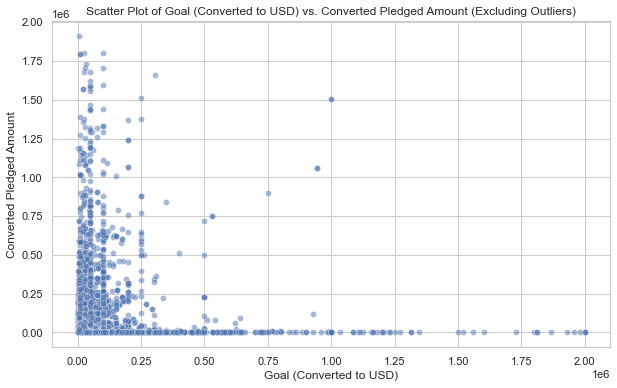

In [25]:
outlier_threshold = 2000000  # Adjust as needed

# Filter the data to exclude outliers
filtered_data = train_df[(train_df['goal_converted_to_USD'] <= outlier_threshold) & 
                         (train_df['converted_pledged_amount'] <= outlier_threshold)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="goal_converted_to_USD", y="converted_pledged_amount", data=filtered_data, alpha=0.5)
plt.title('Scatter Plot of Goal (Converted to USD) vs. Converted Pledged Amount (Excluding Outliers)')
plt.xlabel('Goal (Converted to USD)')
plt.ylabel('Converted Pledged Amount')

plt.show()







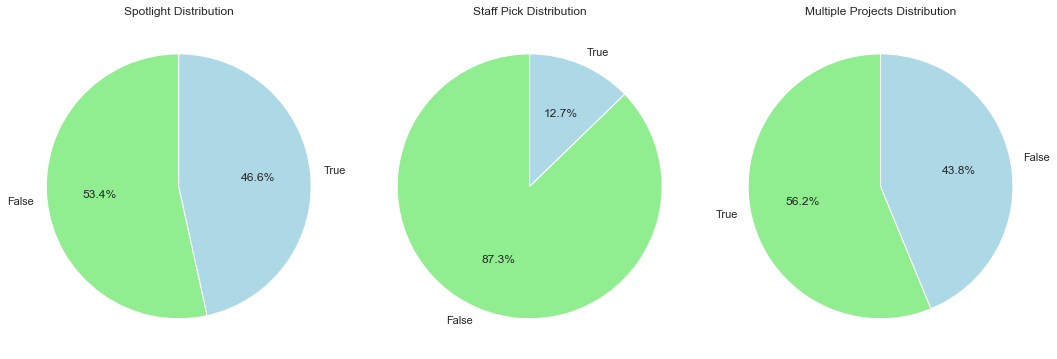

In [30]:
spotlight_counts = train_df['spotlight'].value_counts()
staff_pick_counts = train_df['staff_pick'].value_counts()
multiple_projects_counts = train_df['Multiple Projects'].value_counts()
custom_colors = ["lightgreen", "lightblue"]
sns.set_palette(custom_colors)
# Create subplots for three pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for 'spotlight'
axes[0].pie(spotlight_counts, labels=spotlight_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Spotlight Distribution')

# Pie chart for 'staff_pick'
axes[1].pie(staff_pick_counts, labels=staff_pick_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Staff Pick Distribution')

# Pie chart for 'Multiple Projects'
axes[2].pie(multiple_projects_counts, labels=multiple_projects_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Multiple Projects Distribution')

# Adjust layout
plt.tight_layout()

# Display the pie charts
plt.show()

<Figure size 7200x5760 with 0 Axes>

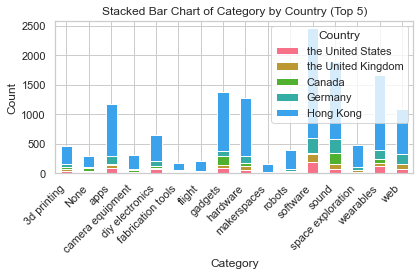

In [36]:
top_countries = train_df['country_displayable_name'].value_counts().head(5).index
filtered_df = train_df[train_df['country_displayable_name'].isin(top_countries)]

# Create a crosstab to count the number of projects in each category for each country
category_country_crosstab = pd.crosstab(filtered_df['Category'], filtered_df['country_displayable_name'])

# Create a stacked bar chart
plt.figure(figsize=(100, 80))
sns.set_palette("husl")  # Set color palette

category_country_crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Category by Country (Top 5)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

plt.legend(title='Country', loc='upper right', labels=top_countries)

plt.tight_layout()
plt.show()

<Figure size 1152x576 with 0 Axes>

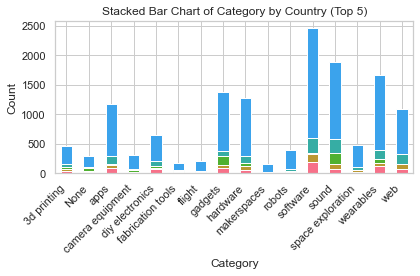

In [37]:
top_countries = train_df['country_displayable_name'].value_counts().head(5).index
filtered_df = train_df[train_df['country_displayable_name'].isin(top_countries)]

# Create a crosstab to count the number of projects in each category for each country
category_country_crosstab = pd.crosstab(filtered_df['Category'], filtered_df['country_displayable_name'])

# Create a larger stacked bar chart
plt.figure(figsize=(16, 8))  # Adjust the figsize for a larger chart
sns.set_palette("husl")  # Set color palette

category_country_crosstab.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Category by Country (Top 5)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")

# Remove the legend
plt.legend().remove()

plt.tight_layout()
plt.show()

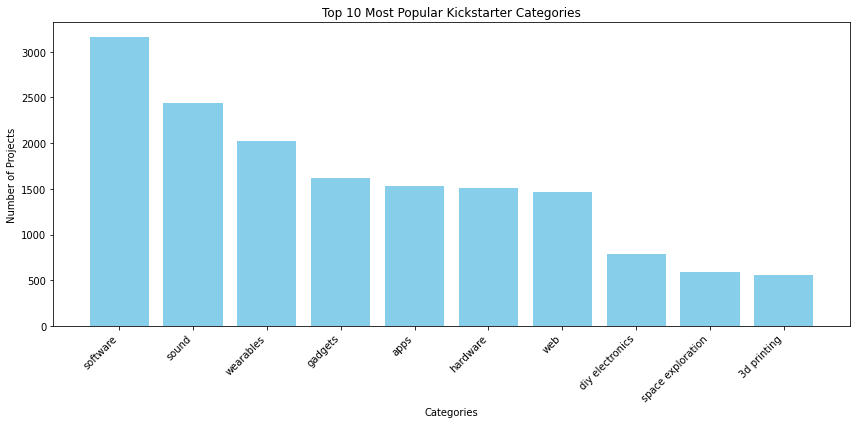

In [18]:
categories = most_popular_categories.head(10).index
counts = most_popular_categories.head(10).values

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.xlabel('Categories')
plt.ylabel('Number of Projects')
plt.title('Top 10 Most Popular Kickstarter Categories')
plt.tight_layout()

# Show the graph
plt.show()

In [19]:
# Get the most popular countries
most_popular_countries = train_df['country_displayable_name'].value_counts().sort_values(ascending=False)

# Print the most popular countries
print(most_popular_countries.head(10))

the United States     10375
the United Kingdom     1471
Canada                  975
Germany                 663
Hong Kong               635
Australia               516
France                  498
Italy                   401
Spain                   344
the Netherlands         290
Name: country_displayable_name, dtype: int64


In [ ]:
sns.set(style="whitegrid")

# Create a histogram for converted_pledged_amount
plt.figure(figsize=(10, 6))
sns.histplot(train_df['converted_pledged_amount'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Converted Pledged Amount')
plt.xlabel('Converted Pledged Amount')
plt.ylabel('Frequency')
plt.show()

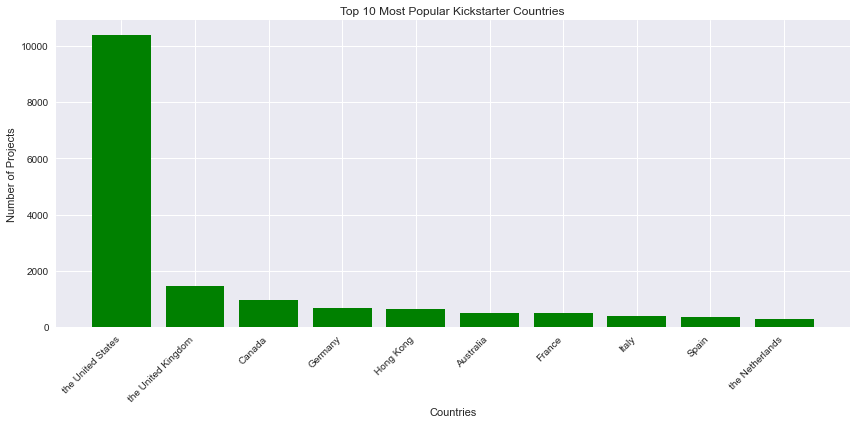

In [345]:
countries = most_popular_countries.head(10).index
counts = most_popular_countries.head(10).values

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(countries, counts, color='green')
plt.xticks(rotation=45, ha='right')  # Rotate country labels for better readability
plt.xlabel('Countries')
plt.ylabel('Number of Projects')
plt.title('Top 10 Most Popular Kickstarter Countries')
plt.tight_layout()

# Show the graph
plt.show()

In [41]:
# Create a new DataFrame to store the success rate of projects by creator's location
success_rate_by_location = train_df.groupby('country_displayable_name')['state'].value_counts(normalize=True)

# Print the success rate of projects by creator's location
print(success_rate_by_location)

country_displayable_name  state     
Australia                 failed        0.594961
                          successful    0.405039
Austria                   failed        0.617391
                          successful    0.382609
Belgium                   failed        0.805556
                          successful    0.194444
Canada                    failed        0.548718
                          successful    0.451282
Denmark                   failed        0.563492
                          successful    0.436508
France                    failed        0.602410
                          successful    0.397590
Germany                   failed        0.627451
                          successful    0.372549
Greece                    failed        1.000000
Hong Kong                 successful    0.796850
                          failed        0.203150
Ireland                   failed        0.563380
                          successful    0.436620
Italy                     failed

In [ ]:
# Create a swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=train_df, x='country_displayable_name', y='state', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Project Outcome')
plt.title(f'Project Outcomes of Kickstarter Projects by Country (Top {top_n_countries})')
plt.tight_layout()
plt.show()

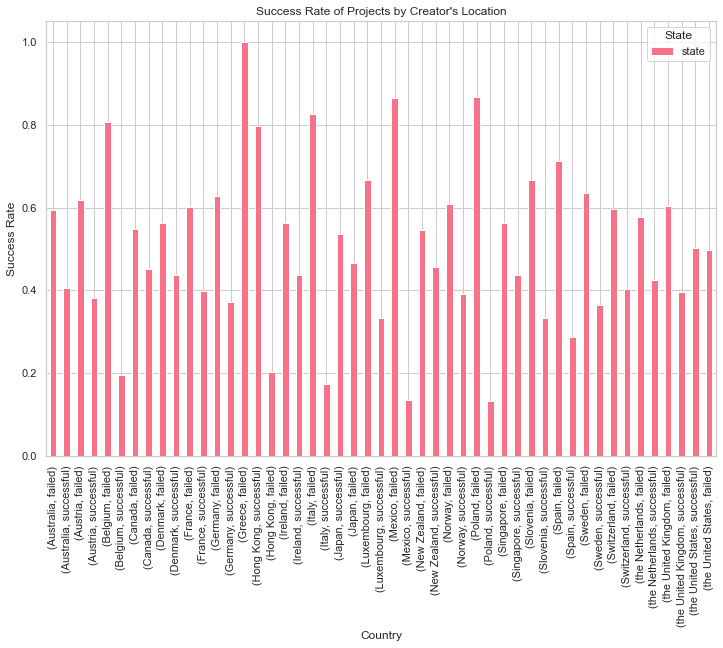

In [45]:
import matplotlib.pyplot as plt

# Assuming success_rate_by_location is a Pandas Series with the data
# Make sure it's in the right format for plotting

# Reshape the data for plotting


# Plot the stacked bar chart
ax = success_rate_by_location.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.title('Success Rate of Projects by Creator\'s Location')

# Show the legend
plt.legend(title='State')

# Display the plot
plt.show()








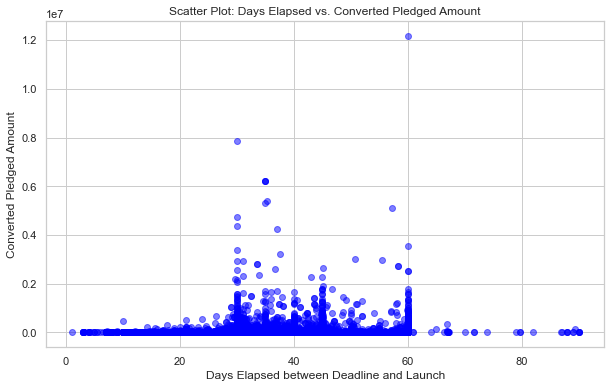

In [46]:
import matplotlib.pyplot as plt

# Extract the data
days_elapsed = train_df['Days Elapsed between deadline and launch']
pledged_amount = train_df['converted_pledged_amount']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(days_elapsed, pledged_amount, alpha=0.5, color='blue')

# Set labels and title
plt.xlabel('Days Elapsed between Deadline and Launch')
plt.ylabel('Converted Pledged Amount')
plt.title('Scatter Plot: Days Elapsed vs. Converted Pledged Amount')

# Show the plot
plt.show()


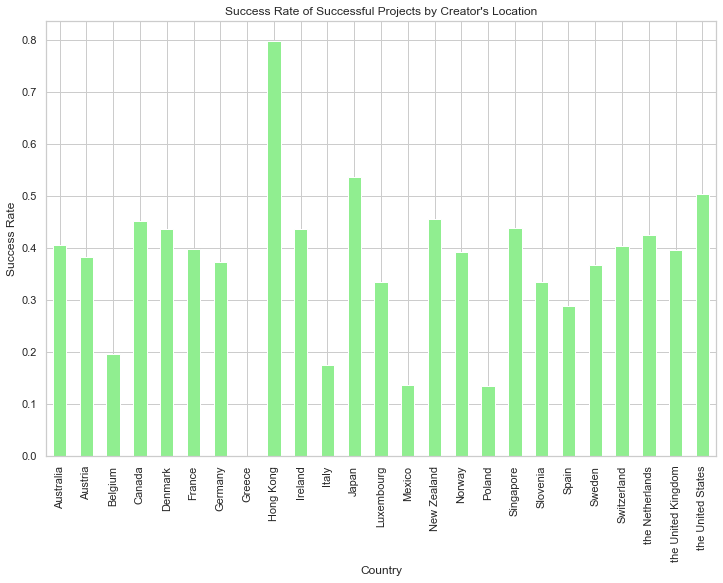

In [49]:
success_rate_by_location = success_rate_by_location.unstack().loc[:, 'successful']

# Plot the stacked bar chart
ax = success_rate_by_location.plot(kind='bar', figsize=(12, 8), color='lightgreen')

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.title('Success Rate of Successful Projects by Creator\'s Location')

# Display the plot
plt.show()





<Axes: xlabel='Category', ylabel='converted_pledged_amount'>

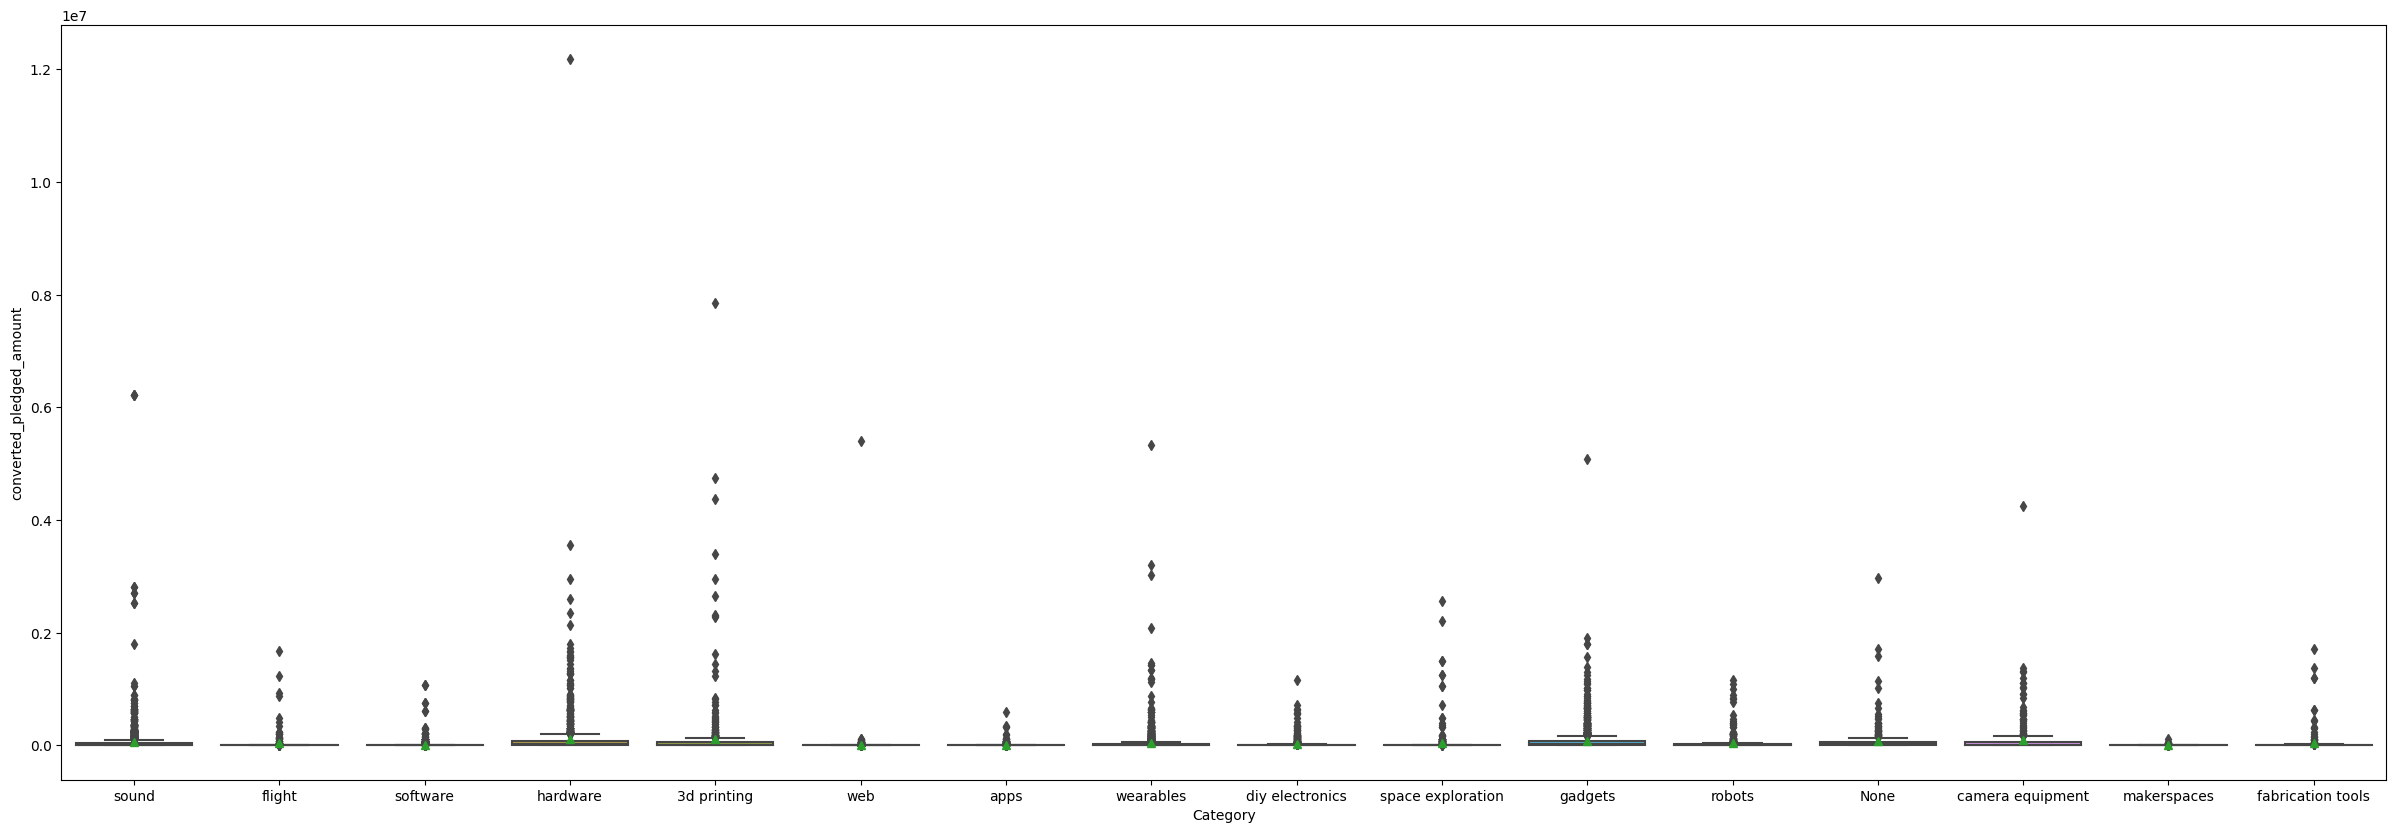

In [21]:
plt.figure(figsize=(30, 10), dpi=100)

sns.boxplot(
    x='Category',
    y='converted_pledged_amount',
    showmeans=True,
    data=train_df
)

In [22]:
corr_matrix = train_df.corr()
corr_matrix['converted_pledged_amount'].sort_values(ascending=False)

converted_pledged_amount                    1.000000
staff_pick                                  0.239408
spotlight                                   0.201782
name                                        0.080538
Days Elapsed between deadline and launch    0.040702
Days Elapsed between Launch and Creation    0.007002
goal_converted_to_USD                       0.003723
Multiple Projects                          -0.001665
blurb                                      -0.013084
Name: converted_pledged_amount, dtype: float64

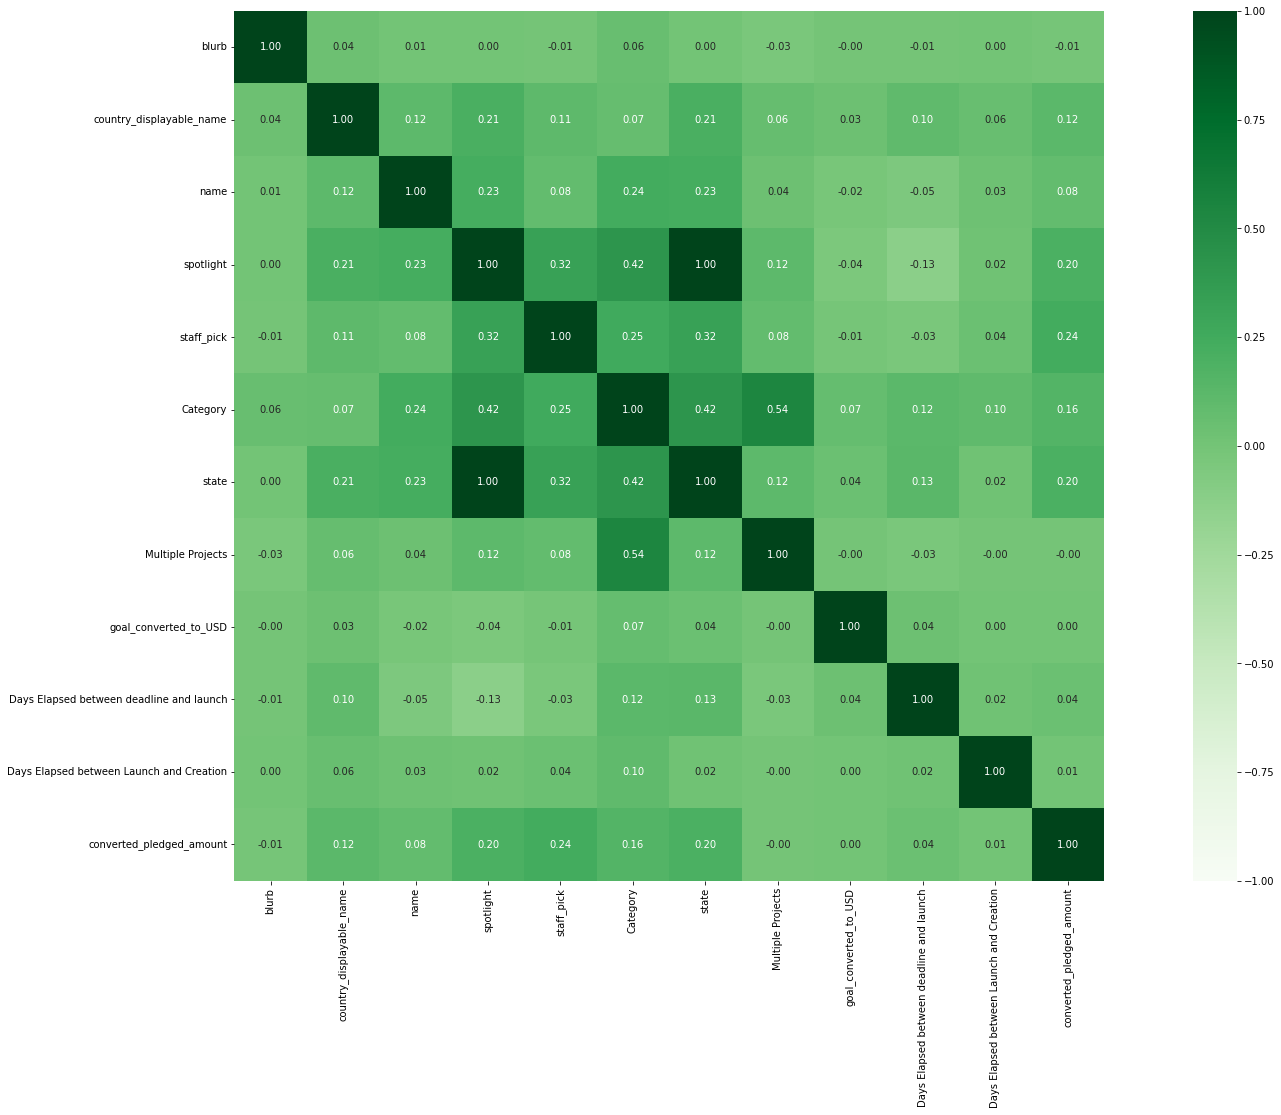

In [23]:
from dython.nominal import associations
_ = associations(train_df, cmap="Greens", figsize=(32, 16))

## Dummy Variables

In [24]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

# categorical columns to transform
cat_cols = ["country_displayable_name", "spotlight" , "staff_pick", "Category", "state"]

# fit an encoder and transform the **trainset**
cat_vals = train_df[cat_cols].to_numpy()
transformed = one_hot_encoder.fit_transform(cat_vals)

# the names of the new columns are the unique values of "ocean_proximity"
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)

# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    train_df[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
train_df.head()

,blurb,country_displayable_name,name,spotlight,staff_pick,Category,state,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,...,Category_gadgets,Category_hardware,Category_makerspaces,Category_robots,Category_software,Category_sound,Category_space exploration,Category_wearables,Category_web,state_successful
4824,22,the United States,3,False,False,sound,failed,True,50000.000000,60.041667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21294,23,Mexico,4,False,False,flight,failed,False,1179.429304,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18999,11,Spain,9,False,False,sound,failed,True,104563.392600,30.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17148,8,the United States,6,False,False,software,failed,True,1250.000000,32.277627,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21208,18,the United States,9,False,False,sound,failed,True,2000.000000,30.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
del train_df["country_displayable_name"]
del train_df["spotlight"]
del train_df["Category"]
del train_df["staff_pick"]
del train_df["state"]

In [26]:
train_df.head()

,blurb,name,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation,converted_pledged_amount,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,...,Category_gadgets,Category_hardware,Category_makerspaces,Category_robots,Category_software,Category_sound,Category_space exploration,Category_wearables,Category_web,state_successful
4824,22,3,True,50000.000000,60.041667,56.748646,359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21294,23,4,False,1179.429304,30.000000,1.774028,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18999,11,9,True,104563.392600,30.000000,32.843785,247,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17148,8,6,True,1250.000000,32.277627,3.795139,26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21208,18,9,True,2000.000000,30.000000,1.258356,1619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
# transform the **testset** using the encoder fitted on trainset
cat_vals = test_df[cat_cols].to_numpy()
transformed = one_hot_encoder.transform(cat_vals)

# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    test_df[new_col_name] = transformed[:,i]
    
# check if the dummies are produced correctly in the testset
test_df.head()

,blurb,country_displayable_name,name,spotlight,staff_pick,Category,state,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,...,Category_gadgets,Category_hardware,Category_makerspaces,Category_robots,Category_software,Category_sound,Category_space exploration,Category_wearables,Category_web,state_successful
16563,15,Germany,5,False,False,web,failed,False,160145.199,30.041667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20459,20,the United States,7,True,False,None,successful,False,15000.000,36.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6503,14,the United States,9,True,False,diy electronics,successful,True,1000.000,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8739,25,the United States,12,True,False,hardware,successful,False,10000.000,60.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
134,15,the United States,6,True,True,sound,successful,True,101000.000,30.041667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
del test_df["country_displayable_name"]
del test_df["spotlight"]
del test_df["Category"]
del test_df["staff_pick"]
del test_df["state"]

## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

trainset_target = train_df['converted_pledged_amount'].values
trainset_predictors = train_df.drop('converted_pledged_amount', axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
train_df = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
train_df['converted_pledged_amount'] = trainset_target

# inspect the data
train_df.head()

,blurb,name,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,...,Category_hardware,Category_makerspaces,Category_robots,Category_software,Category_sound,Category_space exploration,Category_wearables,Category_web,state_successful,converted_pledged_amount
0,0.869238,-1.111541,0.882504,-0.019644,1.975540,-0.056891,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,2.492617,-0.187254,-0.360592,-0.302335,-0.933326,359
1,1.058120,-0.754694,-1.133140,-0.067245,-0.503486,-0.434227,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,-0.401185,-0.187254,-0.360592,-0.302335,-0.933326,40
2,-1.208459,1.029542,0.882504,0.033556,-0.503486,-0.220970,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,2.492617,-0.187254,-0.360592,-0.302335,-0.933326,247
3,-1.775104,-0.041000,0.882504,-0.067177,-0.315538,-0.420354,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,2.133766,-0.401185,-0.187254,-0.360592,-0.302335,-0.933326,26
4,0.113712,1.029542,0.882504,-0.066445,-0.503486,-0.437766,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,2.492617,-0.187254,-0.360592,-0.302335,-0.933326,1619


In [30]:
testset_target = test_df['converted_pledged_amount'].values
testset_predictors = test_df.drop('converted_pledged_amount', axis=1)

scaled_vals = scaler.transform(testset_predictors)
test_df = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
test_df['converted_pledged_amount'] = testset_target

test_df.head()

,blurb,name,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,...,Category_hardware,Category_makerspaces,Category_robots,Category_software,Category_sound,Category_space exploration,Category_wearables,Category_web,state_successful,converted_pledged_amount
0,-0.452933,-0.397847,-1.133140,0.087750,-0.500048,-0.410341,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,-0.401185,-0.187254,-0.360592,3.307594,-0.933326,1458
1,0.491475,0.315847,-1.133140,-0.053770,-0.008369,0.091222,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,-0.401185,-0.187254,-0.360592,-0.302335,1.071436,47206
2,-0.641815,1.029542,0.882504,-0.067420,-0.503486,-0.249493,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,-0.401185,-0.187254,-0.360592,-0.302335,1.071436,8312
3,1.435883,2.100083,-1.133140,-0.058645,1.972102,-0.204312,-0.081183,-0.064157,-0.242433,-0.085004,...,3.255926,-0.109206,-0.163077,-0.468655,-0.401185,-0.187254,-0.360592,-0.302335,1.071436,3117228
4,-0.452933,-0.041000,0.882504,0.030082,-0.500048,1.568414,-0.081183,-0.064157,-0.242433,-0.085004,...,-0.307132,-0.109206,-0.163077,-0.468655,2.492617,-0.187254,-0.360592,-0.302335,1.071436,177785


In [31]:
#separating target variable and predictor to two separate data frame
Xtrain = train_df.drop("converted_pledged_amount", axis=1)
ytrain = train_df["converted_pledged_amount"].copy()
#same step done for test set
Xtest = test_df.drop("converted_pledged_amount", axis=1)
ytest = test_df["converted_pledged_amount"].copy()

In [32]:
print(Xtrain.shape)
print(train_df.shape)

(17564, 48)
(17564, 49)


# Modelling

### Baseline

In [33]:
median_pledged_amount = ytrain.mean()
median_pledged_amount

45553.27135048964

In [34]:
# to make sure yhat has the same number of rows as ytrain,
yhat = np.full((ytrain.shape[0], 1), median_pledged_amount)
baseline_mse = mean_squared_error(ytrain, yhat)
baseline_mse
# take square root
baseline_rmse = np.sqrt(baseline_mse)
baseline_rmse

227852.77789931247

In [35]:
#creating a function that displays RMSE and STD scores which will be used in␣every model
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

In [36]:
lin_reg = LinearRegression()
#cross validation with 10 parts, we have to take negative sign with this to get the right value
lin_reg_scores = -cross_val_score(lin_reg, Xtrain, ytrain, scoring="neg_root_mean_squared_error", cv=10)
display_scores(lin_reg_scores)

Scores: [247602.87773711 159384.53661363 270314.18283562 140835.35613025
 180673.97219167 180622.0807284  177352.65901964 110008.96240174
 336494.78434301 268453.82159549]
Mean: 207174.32335965516
Standard deviation: 66725.19758070447


In [37]:
#fitting linear regression to training data
lin_reg.fit(Xtrain, ytrain)
#checking R-squared
lin_reg.score(Xtrain, ytrain)

0.0996210596794409

In [38]:
#Predicting values
lin_yhat = lin_reg.predict(Xtrain)
lin_mse = mean_squared_error(ytrain, lin_yhat)
# take square root
lin_rmse = np.sqrt(lin_mse)
#calculated RMSE
lin_rmse

216205.62656675116

<Axes: >

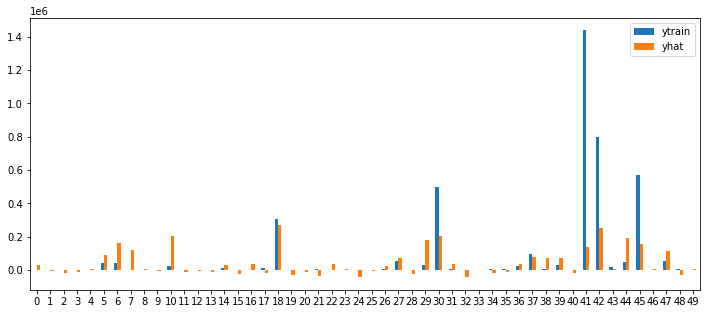

In [39]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": lin_yhat[:50]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

### Decision Tree

In [40]:
#decision tree parameters
decisiontree_param_grid= { 'max_depth':[2,4,6,8,10,12,14,16,None]}
decisiontree_reg=DecisionTreeRegressor()
#grid search with 10 splits
decisiontree_grid_search = GridSearchCV(decisiontree_reg,decisiontree_param_grid, cv=10,
scoring='neg_root_mean_squared_error',
return_train_score=True, verbose=2)
#fitting
decisiontree_grid_search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, None]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [41]:
joblib.dump(decisiontree_grid_search, 'decisiontree_grid_search.pkl')

['decisiontree_grid_search.pkl']

In [42]:
decisiontree_best=decisiontree_grid_search.best_estimator_
decisiontree_best

DecisionTreeRegressor(max_depth=4)

In [43]:
#looking at the mean RMSE value for different cross validations as well as standard deviations
decisiontree_rmse_scores = -cross_val_score(decisiontree_best, Xtrain, ytrain, scoring="neg_root_mean_squared_error", cv=10)
display_scores(decisiontree_rmse_scores)

Scores: [216954.27396052 153133.33759426 185348.09724675 137797.74275533
 175131.17295277 176537.91363715 174999.25702649 108720.52194582
 329775.83404629 220443.64950989]
Mean: 187884.1800675271
Standard deviation: 56995.98039406836


In [44]:
#table created for different train and validation RMSE and % difference
cv_results = pd.DataFrame(decisiontree_grid_search.cv_results_)[['params','mean_train_score', 'mean_test_score']]
cv_results["mean_train_score"] = -cv_results["mean_train_score"]
cv_results["mean_test_score"] = -cv_results["mean_test_score"]
cv_results["diff, %"] =100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
)/cv_results["mean_train_score"]
cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
1,{'max_depth': 4},186995.948711,188076.059007,-0.577612
2,{'max_depth': 6},167721.405199,200317.995630,-19.434961
0,{'max_depth': 2},208002.227367,208812.415320,-0.389509
3,{'max_depth': 8},141793.322383,215195.098711,-51.766737
4,{'max_depth': 10},121042.740466,221303.528928,-82.830898
5,{'max_depth': 12},92271.290745,238886.374346,-158.895668
8,{'max_depth': None},-0.000000,260005.088980,inf
6,{'max_depth': 14},56253.439614,261424.662346,-364.726538
7,{'max_depth': 16},30346.676536,261815.927255,-762.749919


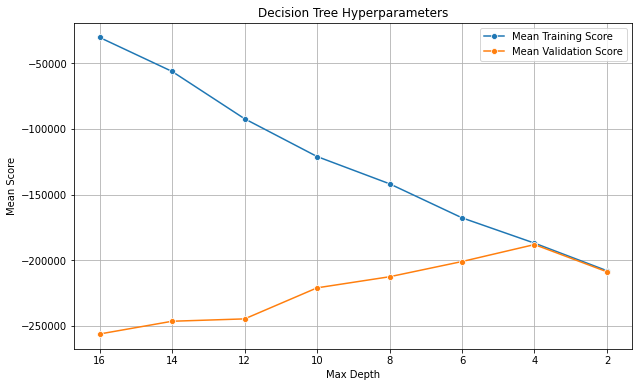

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data (Multiply by -1 to make values positive)
max_depths = [2, 4, 6, 8, 10, 12, 14, 16, None]
mean_train_scores = np.array([-208002.22736725, -186995.94871129, -167721.40519915, -141793.32238337, -121042.7404661, -92271.29074488, -56253.43961419, -30346.67653578, 0])
mean_test_scores = np.array([-208812.4153199, -188076.05900715, -200995.78567564, -212592.75512777, -221034.02172102, -244684.96994697, -246479.03213334, -256175.18847844, -260088.19099523])

# Create a DataFrame for Seaborn
import pandas as pd
data = pd.DataFrame({'Max Depth': max_depths, 'Mean Training Score': mean_train_scores, 'Mean Testing Score': mean_test_scores})

# Plotting the learning curve using Seaborn with the typical orientation
plt.figure(figsize=(10, 6))
sns.lineplot(x='Max Depth', y='Mean Training Score', data=data, marker='o', label='Mean Training Score')
sns.lineplot(x='Max Depth', y='Mean Testing Score', data=data, marker='o', label='Mean Validation Score')
plt.title('Decision Tree Hyperparameters')
plt.xlabel('Max Depth')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Invert the x-axis for a typical learning curve
plt.show()


In [46]:
decisiontree_RMSE=-decisiontree_grid_search.best_score_
decisiontree_RMSE

188076.0590071466

In [47]:
decisiontree_yhat = decisiontree_best.predict(Xtrain)

<Axes: >

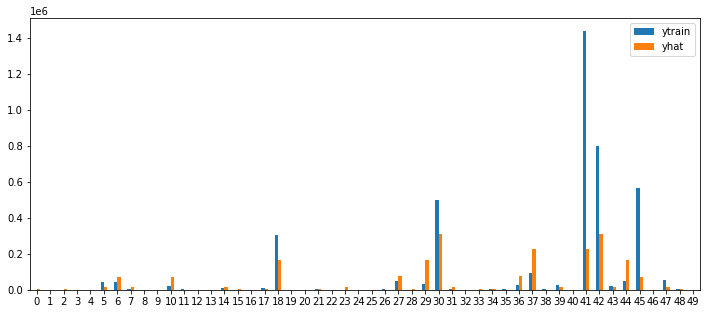

In [48]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": decisiontree_yhat[:50]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(.01, 1, 5)):
    
    plt.figure()
    plt.style.use('seaborn')
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_root_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Plot the learning curves
plot_learning_curve(decisiontree_best, "Learning Curves (Decision Tree)", Xtrain, ytrain, cv=10)

plt.show()


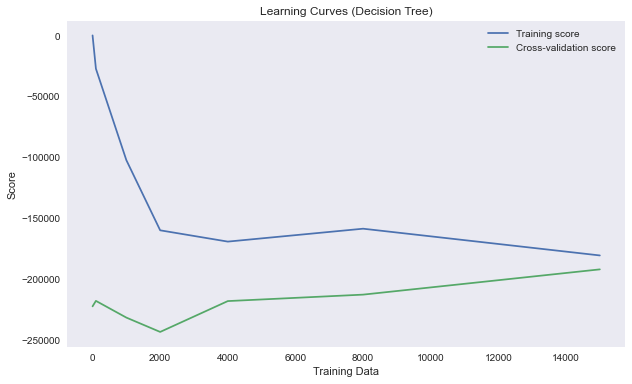

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define your custom training sizes as a numpy array
custom_train_sizes = np.array([1, 100, 1000, 2000, 4000, 8000, 15000])

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=custom_train_sizes):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters:
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    cv : int, cross-validation generator or an iterable
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
    """
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn')
    plt.title(title)
    plt.xlabel("Training Data")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_root_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    
    plt.plot(train_sizes, train_scores_mean,
             label="Training score")
    plt.plot(train_sizes, test_scores_mean,
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curves with your custom training sizes
plot_learning_curve(decisiontree_best, "Learning Curves (Decision Tree)", Xtrain, ytrain, cv=10)

plt.show()


### Random Forest

In [50]:
# specify the hyperparameters and their values
forest_param_grid = {
'n_estimators': [3, 10, 30, 100, 300],
'max_depth': [4, 6, 8, None]
}
forest_reg = RandomForestRegressor(random_state=7)
# we'll use 10-fold cross-validation
forest_grid_search = GridSearchCV(forest_reg, forest_param_grid, cv=10,
scoring='neg_root_mean_squared_error',
return_train_score=True, verbose=2)
forest_grid_search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=4, n

[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END ........................max_depth=8, n_estimators=3; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=10; total time=   0.4s
[CV] END .......................max_depth=8, n_estimators=10; total time=   0.6s
[CV] END .......................max_depth=8, n_estimators=10; total time=   0.5s
[CV] END ...................

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7),
             param_grid={'max_depth': [4, 6, 8, None],
                         'n_estimators': [3, 10, 30, 100, 300]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [51]:
joblib.dump(decisiontree_grid_search, 'forest_grid_search.pkl')

['forest_grid_search.pkl']

In [52]:
#best hyperparameters for random forest
forest_best=forest_grid_search.best_estimator_
forest_best

RandomForestRegressor(max_depth=6, random_state=7)

In [53]:
#RMSE across different cross validations
forest_rmse_scores = -cross_val_score(forest_best, Xtrain, ytrain,scoring="neg_root_mean_squared_error", cv=10)
display_scores(forest_rmse_scores)

Scores: [188327.51901727 154768.12023815 190560.40740331 125729.07108463
 167655.19140093 172894.49410252 201356.60012552 102273.12759326
 318773.90790173 217336.44470985]
Mean: 183967.48835771583
Standard deviation: 55640.00612403376


In [54]:
#creating table for training and validation RMSE
cv_results = pd.DataFrame(forest_grid_search.cv_results_)[['params','mean_train_score', 'mean_test_score']]
cv_results["mean_train_score"] = -cv_results["mean_train_score"]
cv_results["mean_test_score"] = -cv_results["mean_test_score"]
cv_results["diff, %"] =100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
)/cv_results["mean_train_score"]
cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
8,"{'max_depth': 6, 'n_estimators': 100}",157360.327484,183967.488358,-16.908430
12,"{'max_depth': 8, 'n_estimators': 30}",134617.453703,184064.643865,-36.731634
13,"{'max_depth': 8, 'n_estimators': 100}",134117.760897,184240.573603,-37.372241
9,"{'max_depth': 6, 'n_estimators': 300}",156774.579135,184448.141646,-17.651817
7,"{'max_depth': 6, 'n_estimators': 30}",156857.643616,184490.230705,-17.616347
14,"{'max_depth': 8, 'n_estimators': 300}",133766.442131,184802.715860,-38.153271
3,"{'max_depth': 4, 'n_estimators': 100}",182162.075666,185984.364577,-2.098290
2,"{'max_depth': 4, 'n_estimators': 30}",182439.283484,185988.194729,-1.945256
4,"{'max_depth': 4, 'n_estimators': 300}",181760.460882,186543.808072,-2.631676
5,"{'max_depth': 6, 'n_estimators': 3}",168035.018596,186619.370576,-11.059809


In [55]:
forest_grid_search.cv_results_

{'mean_fit_time': array([ 0.11866124,  0.31470037,  0.99431362,  3.00415318,  9.41415768,
         0.1475419 ,  0.4659673 ,  1.30777116,  4.46361256, 13.32296183,
         0.16434045,  0.64522476,  1.97424841,  5.54159153, 16.97937572,
         0.42338915,  1.32964191,  4.1885601 , 12.93593841, 39.1275007 ]),
 'std_fit_time': array([0.0303407 , 0.04877136, 0.15999236, 0.15369273, 0.5660799 ,
        0.0238217 , 0.09936622, 0.11023563, 0.19848899, 0.43160161,
        0.01028155, 0.09206301, 0.15281309, 0.25752297, 0.40394955,
        0.04307332, 0.11127392, 0.13474023, 0.85509956, 2.42301378]),
 'mean_score_time': array([0.00357718, 0.00313573, 0.00476563, 0.02635694, 0.06393962,
        0.00462778, 0.0049834 , 0.01004169, 0.02836444, 0.07226446,
        0.00418298, 0.00513394, 0.01721697, 0.04070733, 0.09352818,
        0.00260391, 0.00820017, 0.02793801, 0.09406707, 0.24789848]),
 'std_score_time': array([0.00094717, 0.00351557, 0.00519321, 0.01445819, 0.03193053,
        0.00421829, 

In [56]:
forest_RMSE=-forest_grid_search.best_score_
forest_RMSE

183967.48835771583

In [57]:
forest_yhat = forest_best.predict(Xtrain)

<Axes: >

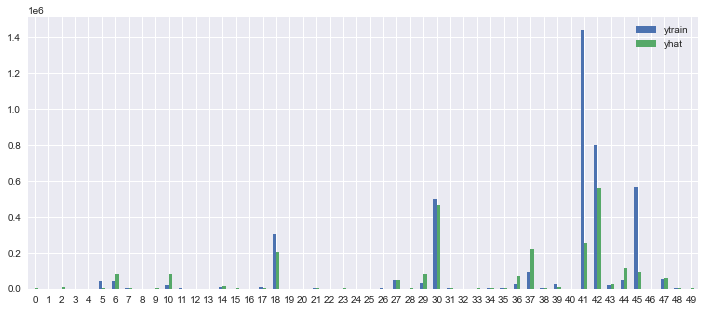

In [58]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": forest_yhat[:50]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

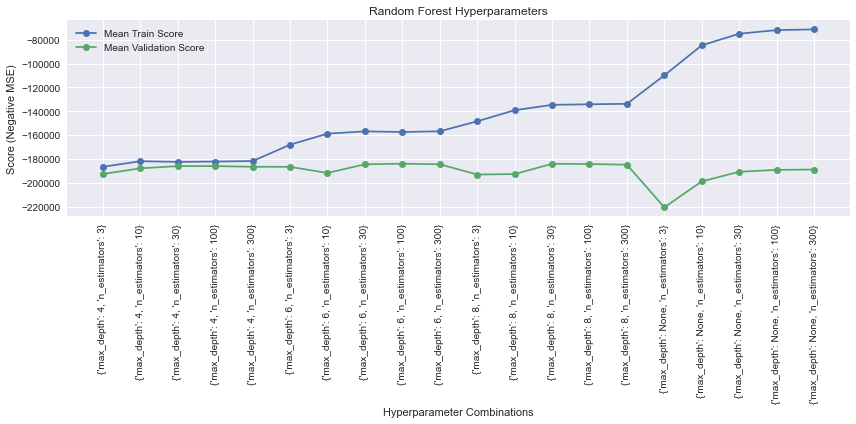

In [59]:
import matplotlib.pyplot as plt

# Data
params = [{'max_depth': 4, 'n_estimators': 3},
  {'max_depth': 4, 'n_estimators': 10},
  {'max_depth': 4, 'n_estimators': 30},
  {'max_depth': 4, 'n_estimators': 100},
  {'max_depth': 4, 'n_estimators': 300},
  {'max_depth': 6, 'n_estimators': 3},
  {'max_depth': 6, 'n_estimators': 10},
  {'max_depth': 6, 'n_estimators': 30},
  {'max_depth': 6, 'n_estimators': 100},
  {'max_depth': 6, 'n_estimators': 300},
  {'max_depth': 8, 'n_estimators': 3},
  {'max_depth': 8, 'n_estimators': 10},
  {'max_depth': 8, 'n_estimators': 30},
  {'max_depth': 8, 'n_estimators': 100},
  {'max_depth': 8, 'n_estimators': 300},
  {'max_depth': None, 'n_estimators': 3},
  {'max_depth': None, 'n_estimators': 10},
  {'max_depth': None, 'n_estimators': 30},
  {'max_depth': None, 'n_estimators': 100},
  {'max_depth': None, 'n_estimators': 300}]

mean_train_scores = [-186577.34424808, -181881.08420349, -182439.28348395,
        -182162.07566623, -181760.46088194, -168035.01859632,
        -158766.69545087, -156857.64361637, -157360.3274841 ,
        -156774.57913543, -148432.1760436 , -139104.27492446,
        -134617.45370337, -134117.76089736, -133766.44213055,
        -109858.62791538,  -84691.75968715,  -74939.89057672,
         -71910.34360532,  -71267.61628959]

mean_val_scores = [-192638.47686466, -187843.8510852 , -185988.19472884,
        -185984.36457714, -186543.80807193, -186619.37057639,
        -191715.1650642 , -184490.23070485, -183967.48835772,
        -184448.14164648, -193038.48720889, -192679.33424207,
        -184064.64386508, -184240.57360292, -184802.71585985,
        -220589.07939281, -198823.97114878, -190736.37003658,
        -189158.89081391, -188849.86959614]


# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(params)), mean_train_scores, label='Mean Train Score', marker='o', linestyle='-')
plt.plot(range(len(params)), mean_val_scores, label='Mean Validation Score', marker='o', linestyle='-')

plt.title('Random Forest Hyperparameters')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Score (Negative MSE)')
plt.legend()
plt.grid(True)
plt.xticks(range(len(params)), [str(p) for p in params], rotation=90)
plt.tight_layout()
plt.show()


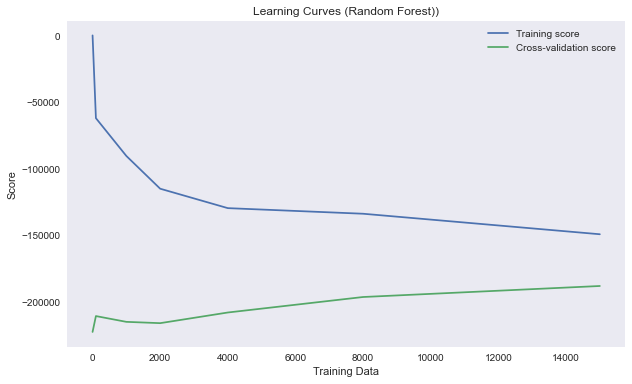

In [60]:
# Plot the learning curves
plot_learning_curve(forest_best, "Learning Curves (Random Forest))", Xtrain, ytrain, cv=10)

plt.show()

### ADA Boost

In [61]:
abr_reg=AdaBoostRegressor()
#adaboost parameter grid
abr_param_grid = {'n_estimators': [3, 10, 100], 'learning_rate': [0.001, 0.01,0.1, 0.25, 0.5, 0.75, 1],'loss' : ['linear', 'square', 'exponential']}
abr_reg=AdaBoostRegressor(random_state=10)
# we'll use 10-fold cross-validation with randomized search
abr_grid_search = RandomizedSearchCV(abr_reg, abr_param_grid, cv=10,
scoring='neg_root_mean_squared_error',
return_train_score=True, verbose=2)
#fit the best model and hyperparameters to the training dataset
abr_grid_search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END .learning_rate=1, loss=exponential, n_estimators=10; total time=   0.4s
[CV] END ..learning_rate=0.75, loss=square, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.75, loss=square, n_

RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=10),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.25, 0.5, 0.75, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [3, 10, 100]},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [62]:
#best adaboost modelling parameters
abr_best = abr_grid_search.best_estimator_
abr_best

AdaBoostRegressor(learning_rate=0.25, loss='exponential', n_estimators=3,
                  random_state=10)

In [63]:
#calclating mean RMSE across different validations
abr_rmse_scores = -cross_val_score(abr_best, Xtrain, ytrain,scoring="neg_root_mean_squared_error", cv=10)
display_scores(abr_rmse_scores)

Scores: [196825.95918974 151217.86079813 206027.28681599 136271.29605216
 173395.6133841  184051.05643723 182879.22896191 106361.12507302
 329885.25469754 252876.55205194]
Mean: 191979.1233461759
Standard deviation: 59610.17861213266


In [64]:
#creating a table for validation and test RMSE for various paramters
cv_results = pd.DataFrame(abr_grid_search.cv_results_)[['params','mean_train_score', 'mean_test_score']]
cv_results["mean_train_score"] = -cv_results["mean_train_score"]
cv_results["mean_test_score"] = -cv_results["mean_test_score"]
cv_results["diff, %"] =100*(cv_results["mean_train_score"]-cv_results["mean_test_score"])/cv_results["mean_train_score"]
cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
8,"{'n_estimators': 3, 'loss': 'exponential', 'le...",193140.539340,191979.123346,0.601332
5,"{'n_estimators': 3, 'loss': 'exponential', 'le...",198186.389163,195504.411072,1.353260
6,"{'n_estimators': 10, 'loss': 'square', 'learni...",193276.123673,195508.406259,-1.154971
2,"{'n_estimators': 3, 'loss': 'exponential', 'le...",194311.218640,200176.991777,-3.018752
9,"{'n_estimators': 10, 'loss': 'square', 'learni...",176925.644843,201350.439651,-13.805118
3,"{'n_estimators': 3, 'loss': 'linear', 'learnin...",197781.368663,204929.237697,-3.614025
7,"{'n_estimators': 3, 'loss': 'square', 'learnin...",194191.020453,228540.454164,-17.688477
0,"{'n_estimators': 10, 'loss': 'exponential', 'l...",204651.441048,232381.842896,-13.550064
1,"{'n_estimators': 100, 'loss': 'square', 'learn...",370232.961529,391757.836464,-5.813873
4,"{'n_estimators': 100, 'loss': 'linear', 'learn...",406027.016488,424085.724549,-4.447662


In [65]:
abr_grid_search.cv_results_

{'mean_fit_time': array([0.49487567, 2.97711101, 0.15690644, 0.15679049, 2.09776361,
        0.16833344, 0.52513034, 0.15547009, 0.15138533, 0.50500605]),
 'std_fit_time': array([0.03428934, 1.02405247, 0.01742113, 0.01638944, 0.64318991,
        0.01819997, 0.05440266, 0.01109931, 0.01639733, 0.03366508]),
 'mean_score_time': array([0.00485873, 0.03804345, 0.00529149, 0.00682786, 0.02450845,
        0.00043941, 0.00332327, 0.01031547, 0.00354915, 0.00728021]),
 'std_score_time': array([0.00597834, 0.01810943, 0.00692535, 0.00850959, 0.00844883,
        0.00090914, 0.00615847, 0.014018  , 0.00621203, 0.00736769]),
 'param_n_estimators': masked_array(data=[10, 100, 3, 3, 100, 3, 10, 3, 3, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=['exponential', 'square', 'exponential', 'linear',
                    'linear', 'exponential', 'squar

In [66]:
abr_RMSE=-abr_grid_search.best_score_
abr_RMSE

191979.1233461759

In [67]:
abr_yhat = abr_best.predict(Xtrain)

<Axes: >

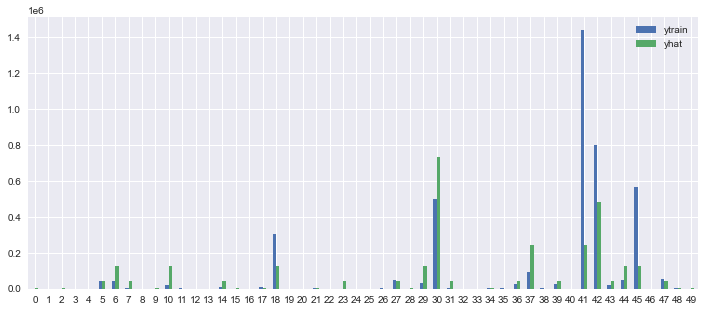

In [68]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": abr_yhat[:50]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

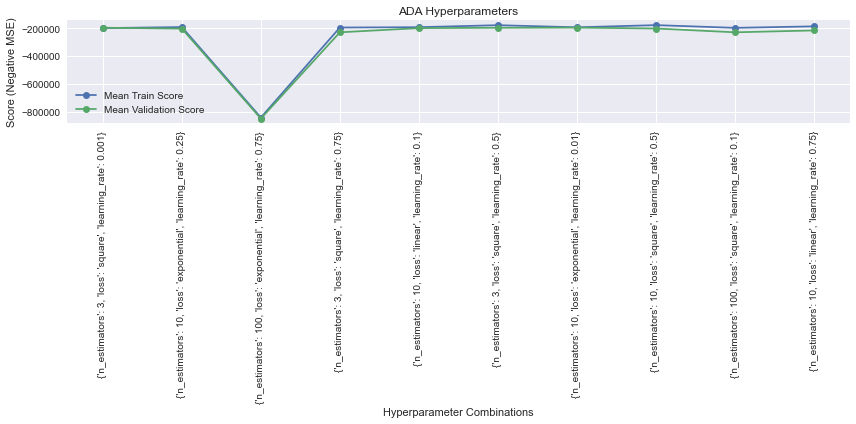

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameters and their values
hyperparameters = [
    {'n_estimators': 3, 'loss': 'square', 'learning_rate': 0.001},
    {'n_estimators': 10, 'loss': 'exponential', 'learning_rate': 0.25},
    {'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.75},
    {'n_estimators': 3, 'loss': 'square', 'learning_rate': 0.75},
    {'n_estimators': 10, 'loss': 'linear', 'learning_rate': 0.1},
    {'n_estimators': 3, 'loss': 'square', 'learning_rate': 0.5},
    {'n_estimators': 10, 'loss': 'exponential', 'learning_rate': 0.01},
    {'n_estimators': 10, 'loss': 'square', 'learning_rate': 0.5},
    {'n_estimators': 100, 'loss': 'square', 'learning_rate': 0.1},
    {'n_estimators': 10, 'loss': 'linear', 'learning_rate': 0.75}
]

mean_train_scores = [-198172.72199719, -190826.02579936, -840342.19448014,
        -194191.02045255, -191807.18285875, -177319.97899222,
        -192664.79775411, -176925.64484348, -196480.94682221,
        -185830.93806882]

mean_val_scores = [-195482.68076534, -201875.84714665, -848060.88131726,
        -228540.45416399, -198428.8276694 , -195907.46894505,
        -194795.66564772, -201350.4396515 , -228563.48290387,
        -215206.10028153]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(hyperparameters)), mean_train_scores, label='Mean Train Score', marker='o', linestyle='-')
plt.plot(range(len(hyperparameters)), mean_val_scores, label='Mean Validation Score', marker='o', linestyle='-')

plt.title('ADA Hyperparameters')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Score (Negative MSE)')
plt.legend()
plt.grid(True)
plt.xticks(range(len(hyperparameters)), [str(p) for p in hyperparameters], rotation=90)
plt.tight_layout()
plt.show()


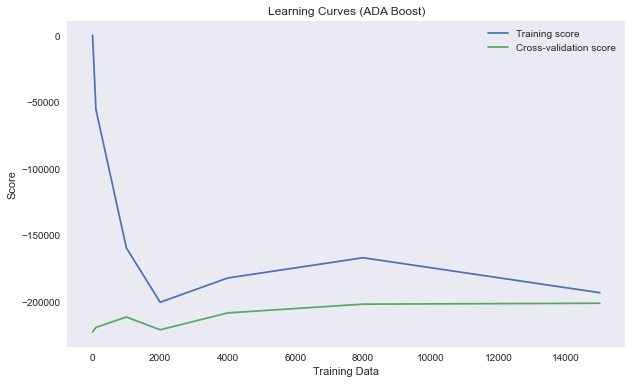

In [70]:
plot_learning_curve(abr_best, "Learning Curves (ADA Boost)", Xtrain, ytrain, cv=10)

plt.show()

### XGBoost

In [71]:
xgb_reg=xgb.XGBRegressor(objective='count:poisson', random_state=42)
#xgboost parameter grid
xgb_param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [3, 5, 7, None],
'learning_rate': [0.01, 0.1, 1]
}
#randomized grid search with 10 fold cross validation
xgb_grid_search = RandomizedSearchCV(xgb_reg, xgb_param_grid, cv=10,
scoring='neg_root_mean_squared_error',
return_train_score=True, verbose=2)
#fit the best model and hyperparameters to the training dataset
xgb_grid_search.fit(Xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.7s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=200; total time=   8.0s
[CV] END .....learning_rate=1, max_depth=7, n_

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          max_leaves=None,
                                          min_ch

In [72]:
#best hyperparamters for xgboost
xgb_best = xgb_grid_search.best_estimator_
xgb_best

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             objective='count:poisson', predictor=None, ...)

In [73]:
#calculation mean RMSE
xgb_rmse_scores = -cross_val_score(xgb_best, Xtrain, ytrain,scoring="neg_root_mean_squared_error", cv=10)
display_scores(xgb_rmse_scores)

Scores: [180654.48462968 135737.14706637 210242.89697168 133953.46834269
 162742.28223657 169296.24658161 155257.03902453  96859.719344
 320945.51548471 217345.17934091]
Mean: 178303.39790227302
Standard deviation: 58449.10615943827


In [74]:
#table of RMSE for training and validation
cv_results = pd.DataFrame(xgb_grid_search.cv_results_)[['params','mean_train_score', 'mean_test_score']]
cv_results["mean_train_score"] = -cv_results["mean_train_score"]
cv_results["mean_test_score"] = -cv_results["mean_test_score"]
cv_results["diff, %"] =100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
)/cv_results["mean_train_score"]
cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
3,"{'n_estimators': 50, 'max_depth': 5, 'learning...",85622.726592,178303.397902,-108.243074
9,"{'n_estimators': 50, 'max_depth': 7, 'learning...",42079.376074,178563.290832,-324.348713
8,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",63447.234644,178699.813033,-181.651066
5,"{'n_estimators': 200, 'max_depth': 5, 'learnin...",22077.929289,180822.857047,-719.020909
7,"{'n_estimators': 100, 'max_depth': 7, 'learnin...",16782.838048,180947.616260,-978.170544
1,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",6674.632037,181290.649204,-2616.114509
4,"{'n_estimators': 200, 'max_depth': 3, 'learnin...",202408.352213,193662.779334,4.320757
2,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",232235.295375,222826.773948,4.051288
0,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",232235.495721,222826.993608,4.051277
6,"{'n_estimators': 100, 'max_depth': 7, 'learnin...",232235.495721,222826.993609,4.051277


In [75]:
xgb_grid_search.cv_results_

{'mean_fit_time': array([2.20013673, 8.14407763, 1.82465184, 1.51297808, 3.74597139,
        5.8709543 , 2.06226416, 4.23703315, 3.66153958, 1.96533902]),
 'std_fit_time': array([0.35580262, 0.1535983 , 0.35869094, 0.09776523, 0.51163693,
        0.10570892, 0.13230112, 0.21582176, 0.1133646 , 0.36371279]),
 'mean_score_time': array([0.0075768 , 0.00908144, 0.00539396, 0.00679111, 0.00777018,
        0.00876188, 0.00186327, 0.00558836, 0.00963273, 0.00714724]),
 'std_score_time': array([0.00615248, 0.00710815, 0.0058323 , 0.00698505, 0.00916331,
        0.00742332, 0.0045395 , 0.00707678, 0.00673183, 0.00670677]),
 'param_n_estimators': masked_array(data=[100, 200, 200, 50, 200, 200, 100, 100, 200, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 7, 7, 5, 3, 5, 7, 7, 3, 7],
              mask=[False, False, False, False, False,

In [76]:
xgb_RMSE=-xgb_grid_search.best_score_
xgb_RMSE

178303.39790227302

In [77]:
#preditind trainig values
xgb_yhat = xgb_best.predict(Xtrain)

<Axes: >

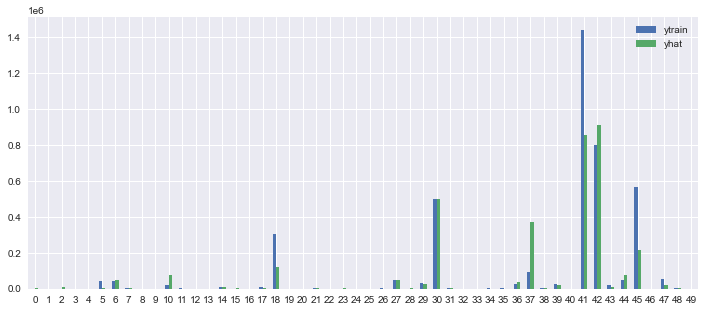

In [78]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": xgb_yhat[:50]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

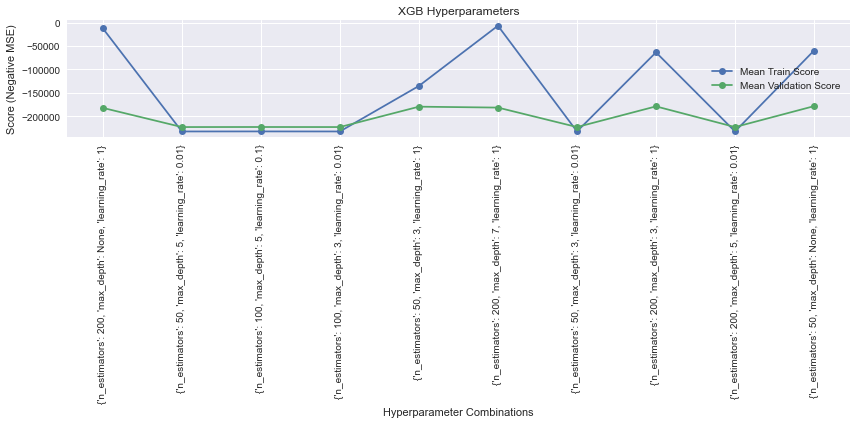

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameters and their values
hyperparameters = [{'n_estimators': 200, 'max_depth': None, 'learning_rate': 1},
  {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01},
  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1},
  {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01},
  {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 1},
  {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 1},
  {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01},
  {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 1},
  {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01},
  {'n_estimators': 50, 'max_depth': None, 'learning_rate': 1}]

mean_train_scores = [-12231.77629282, -232235.5540836 , -232128.67820467,
        -232235.49572099, -135099.36803568,   -6674.63203749,
        -232235.5540836 ,  -63447.23464431, -232235.29537506,
         -59593.21132132]

mean_val_scores = [-181918.69177342, -222827.05760002, -222710.00708466,
        -222826.99360717, -179342.3763853 , -181290.64920409,
        -222827.05759967, -178699.81303295, -222826.77394106,
        -178219.47958683]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(hyperparameters)), mean_train_scores, label='Mean Train Score', marker='o', linestyle='-')
plt.plot(range(len(hyperparameters)), mean_val_scores, label='Mean Validation Score', marker='o', linestyle='-')

plt.title('XGB Hyperparameters')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Score (Negative MSE)')
plt.legend()
plt.grid(True)
plt.xticks(range(len(hyperparameters)), [str(p) for p in hyperparameters], rotation=90)
plt.tight_layout()
plt.show()




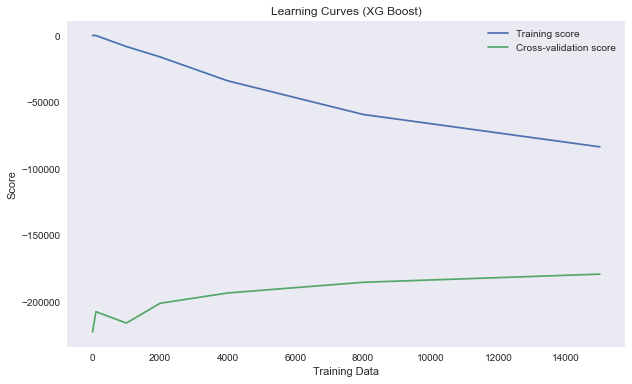

In [80]:
plot_learning_curve(xgb_best, "Learning Curves (XG Boost)", Xtrain, ytrain, cv=10)

plt.show()

## Comparison

In [81]:
RMSE= {
'Baseline':[baseline_rmse],
'Linear Regression':[lin_rmse],
'Decision Tree':[decisiontree_RMSE],
'Random Forest':[forest_RMSE],
'AdaBoostRegressor':[abr_RMSE],
'XGBoostRegressor':[xgb_RMSE]
}
RMSE_df=pd.DataFrame(RMSE).transpose()
RMSE_df.columns=['RMSE']
#formula for %difference
RMSE_df['% diff with Baseline']=((baseline_rmse-RMSE_df['RMSE'])/baseline_rmse)*100
RMSE_df

,RMSE,% diff with Baseline
Baseline,227852.777899,0.000000
Linear Regression,216205.626567,5.111700
Decision Tree,188076.059007,17.457202
Random Forest,183967.488358,19.260371
AdaBoostRegressor,191979.123346,15.744225
XGBoostRegressor,178303.397902,21.746226


## Feature Importance Random Forest

In [82]:
#looking at important features
feature_importances_forest = forest_grid_search.best_estimator_.feature_importances_
# zipping and predicting in descending order
for k, v in sorted(zip(feature_importances_forest, Xtrain.columns),reverse=True):
    print(f"{v}: {k:.3f}")

goal_converted_to_USD: 0.389
Days Elapsed between deadline and launch: 0.119
staff_pick_True: 0.117
blurb: 0.077
Days Elapsed between Launch and Creation: 0.057
country_displayable_name_Slovenia: 0.053
Category_space exploration: 0.036
spotlight_True: 0.025
state_successful: 0.025
Category_hardware: 0.024
country_displayable_name_Hong Kong: 0.022
name: 0.014
Multiple Projects: 0.011
Category_sound: 0.007
Category_camera equipment: 0.005
country_displayable_name_the United States: 0.003
Category_gadgets: 0.003
Category_web: 0.003
Category_wearables: 0.002
country_displayable_name_the United Kingdom: 0.002
Category_None: 0.002
Category_flight: 0.002
Category_fabrication tools: 0.001
country_displayable_name_the Netherlands: 0.000
Category_software: 0.000
Category_robots: 0.000
country_displayable_name_Switzerland: 0.000
country_displayable_name_Japan: 0.000
country_displayable_name_Italy: 0.000
Category_apps: 0.000
country_displayable_name_Canada: 0.000
country_displayable_name_Austria: 

## Feature Importance Decision Tree

In [83]:
feature_importances_decisiontree = decisiontree_grid_search.best_estimator_.feature_importances_
# zipping and predicting in descending order
for k, v in sorted(zip(feature_importances_decisiontree, Xtrain.columns), reverse=True):
    print(f"{v}: {k:.3f}")

goal_converted_to_USD: 0.503
Category_space exploration: 0.189
staff_pick_True: 0.180
Days Elapsed between deadline and launch: 0.086
state_successful: 0.040
Category_web: 0.002
Days Elapsed between Launch and Creation: 0.000
spotlight_True: 0.000
name: 0.000
country_displayable_name_the United States: 0.000
country_displayable_name_the United Kingdom: 0.000
country_displayable_name_the Netherlands: 0.000
country_displayable_name_Switzerland: 0.000
country_displayable_name_Sweden: 0.000
country_displayable_name_Spain: 0.000
country_displayable_name_Slovenia: 0.000
country_displayable_name_Singapore: 0.000
country_displayable_name_Poland: 0.000
country_displayable_name_Norway: 0.000
country_displayable_name_New Zealand: 0.000
country_displayable_name_Mexico: 0.000
country_displayable_name_Luxembourg: 0.000
country_displayable_name_Japan: 0.000
country_displayable_name_Italy: 0.000
country_displayable_name_Ireland: 0.000
country_displayable_name_Hong Kong: 0.000
country_displayable_name_

## Evaluation on Test Data

### Random Forest

In [84]:
#predicting on updated test data
forest_final_yhat = forest_best.predict(Xtest)
#calculating mse
forest_final_mse = mean_squared_error(ytest, forest_final_yhat)
#calculating RMSE
forest_final_RMSE = np.sqrt(forest_final_mse)
forest_final_RMSE

155655.94780945248

<Axes: >

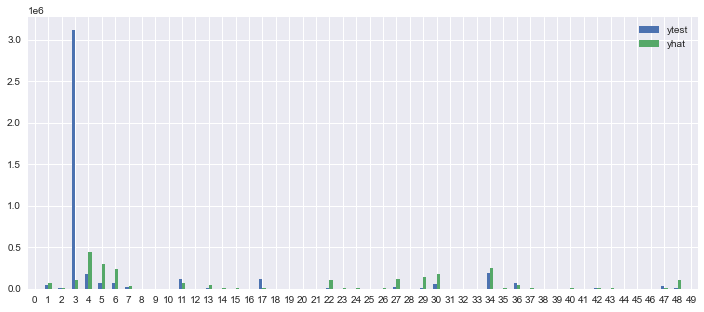

In [85]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytest": ytest[:50], "yhat": forest_final_yhat[:50]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

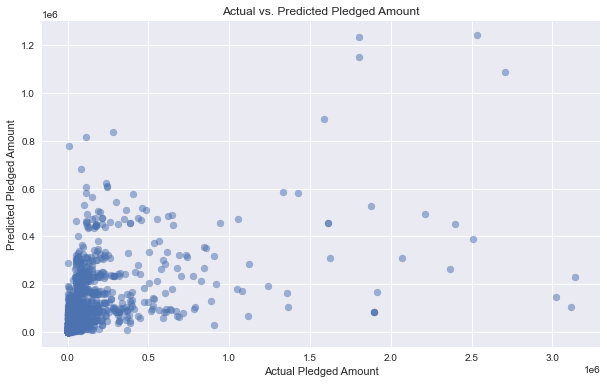

In [86]:
# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, forest_final_yhat, alpha=0.5)
plt.xlabel("Actual Pledged Amount")
plt.ylabel("Predicted Pledged Amount")
plt.title("Actual vs. Predicted Pledged Amount")
plt.show()

### Decision Tree

In [87]:
#predicting on updated test data
decisiontree_final_yhat = decisiontree_best.predict(Xtest)
#calculating mse
decisiontree_final_mse = mean_squared_error(ytest, decisiontree_final_yhat)
#calculating RMSE
decisiontree_final_RMSE = np.sqrt(decisiontree_final_mse)
decisiontree_final_RMSE

164726.28260381214

<Axes: >

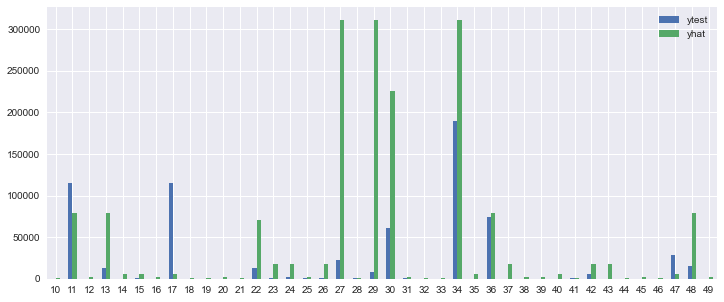

In [88]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytest": ytest[10:50], "yhat": decisiontree_final_yhat[10:50]})
# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

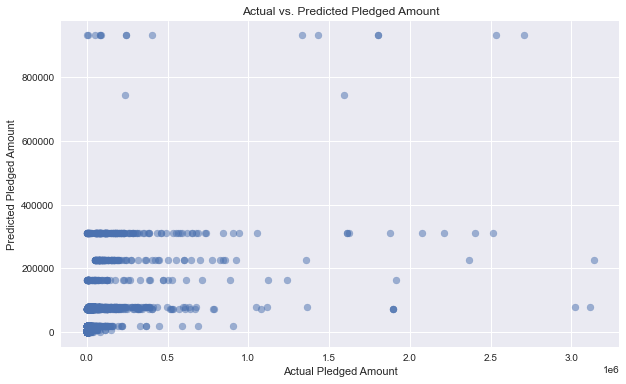

In [89]:
# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, decisiontree_final_yhat, alpha=0.5)
plt.xlabel("Actual Pledged Amount")
plt.ylabel("Predicted Pledged Amount")
plt.title("Actual vs. Predicted Pledged Amount")
plt.show()

## Comparison

In [90]:
RMSE_Stats= {
'Baseline':[baseline_rmse],
'Random Forest Train':[forest_RMSE],
'Random Forest Test':[forest_final_RMSE],
'Decision Tree Train':[decisiontree_RMSE],
'Decision Tree Test':[decisiontree_final_RMSE],
}
Forest_RMSE_df=pd.DataFrame(RMSE_Stats).transpose()
Forest_RMSE_df.columns=['RMSE_Stats']
Forest_RMSE_df['% diff with Baseline']=((baseline_rmse-Forest_RMSE_df["RMSE_Stats"])/baseline_rmse)*100
Forest_RMSE_df

,RMSE_Stats,% diff with Baseline
Baseline,227852.777899,0.000000
Random Forest Train,183967.488358,19.260371
Random Forest Test,155655.947809,31.685736
Decision Tree Train,188076.059007,17.457202
Decision Tree Test,164726.282604,27.704949


In [91]:
DT_model = joblib.load('decisiontree_grid_search.pkl')

In [92]:
import shap

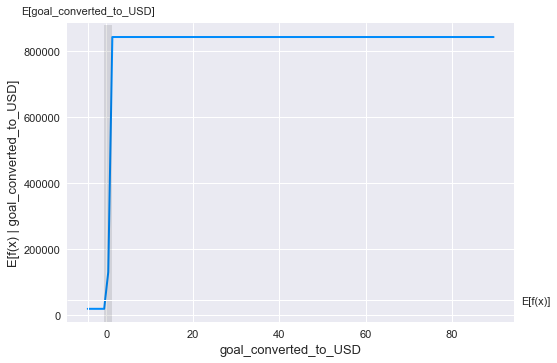

In [152]:
shap.partial_dependence_plot(
    "goal_converted_to_USD"
    , decisiontree_best.predict
    , Xtrain
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
)

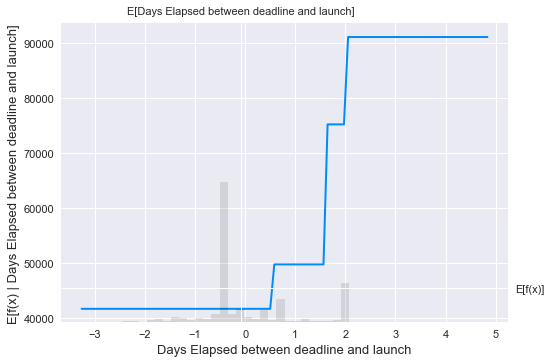

In [153]:
shap.partial_dependence_plot(
    "Days Elapsed between deadline and launch"
    , decisiontree_best.predict
    , Xtrain
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
)

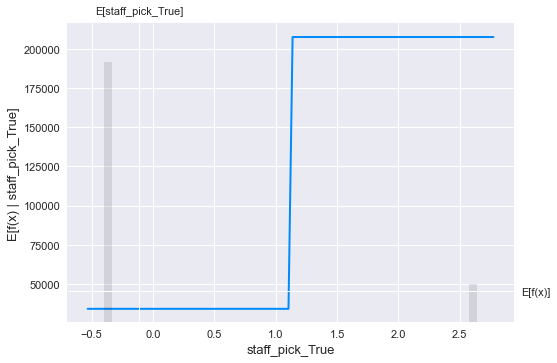

In [154]:
shap.partial_dependence_plot(
    "staff_pick_True"
    , decisiontree_best.predict
    , Xtrain
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
)

In [155]:
X100 = shap.utils.sample(Xtest, 100)

In [156]:
explainer = shap.Explainer(decisiontree_best.predict, X100)
shap_values = explainer(X100)

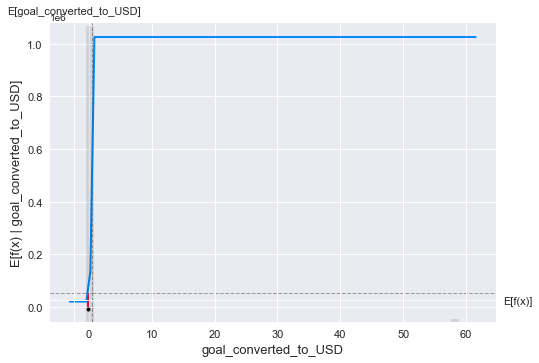

In [157]:
sample_index = 1
shap.partial_dependence_plot(
    "goal_converted_to_USD"
    , decisiontree_best.predict
    , X100
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
    , shap_values=shap_values[sample_index:sample_index+1,:]
)

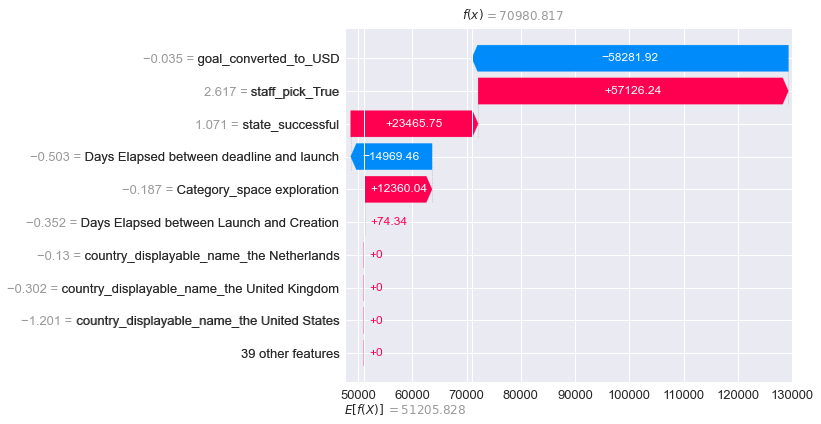

In [158]:
shap.plots.waterfall(shap_values[sample_index], max_display=10)

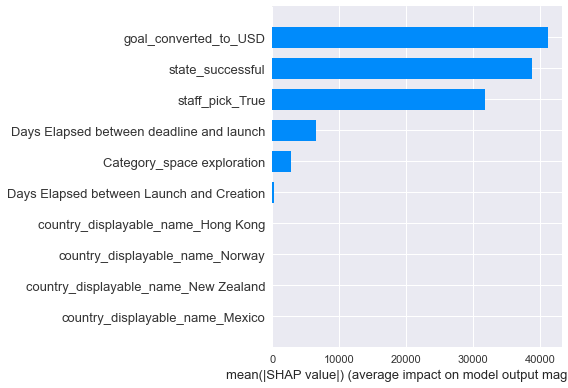

In [159]:
shap.summary_plot(shap_values, max_display=10, show=False, plot_type='bar')

In [160]:
feature_importance = pd.DataFrame({'name': X100.columns, 'importance': shap_values.abs.sum(0).values})
feature_importance= feature_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
feature_importance[feature_importance['importance']>0]

,name,importance
0,goal_converted_to_USD,4.119888e+06
1,state_successful,3.889932e+06
2,staff_pick_True,3.180107e+06
3,Days Elapsed between deadline and launch,6.589335e+05
4,Category_space exploration,2.760408e+05
5,Days Elapsed between Launch and Creation,2.825955e+04


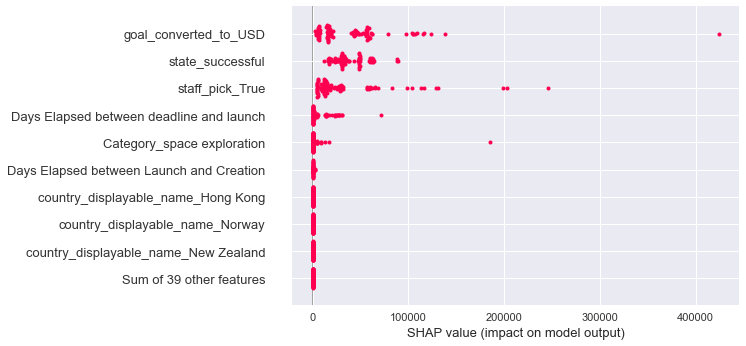

In [161]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

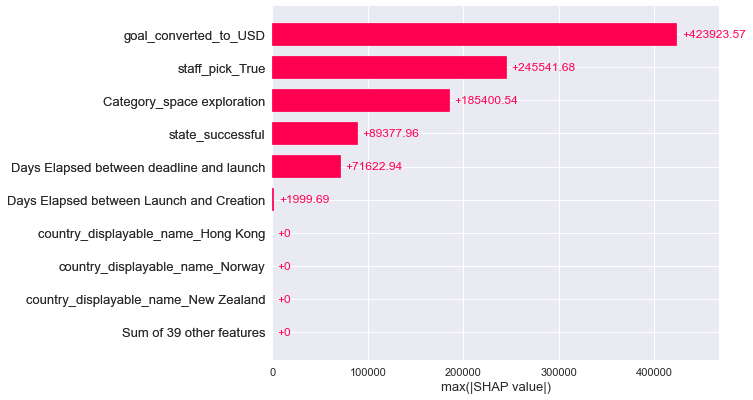

In [162]:
shap.plots.bar(shap_values.abs.max(0))

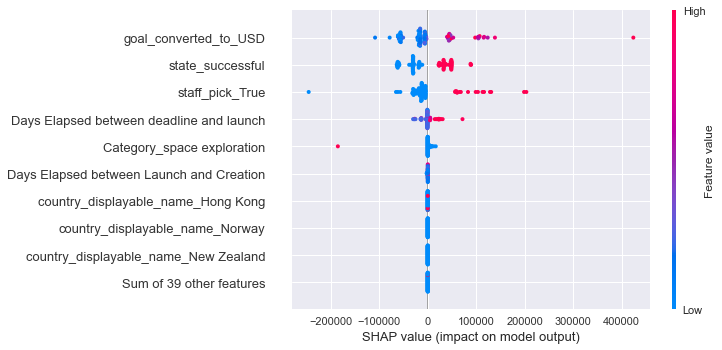

In [163]:
shap.plots.beeswarm(shap_values)

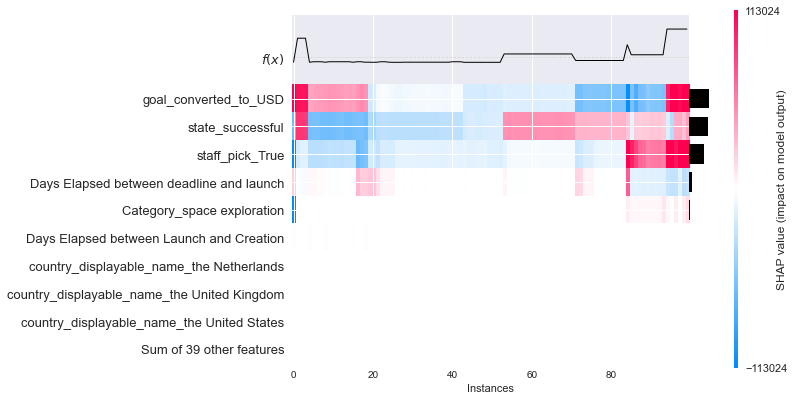

In [164]:
shap.plots.heatmap(shap_values[:1000])

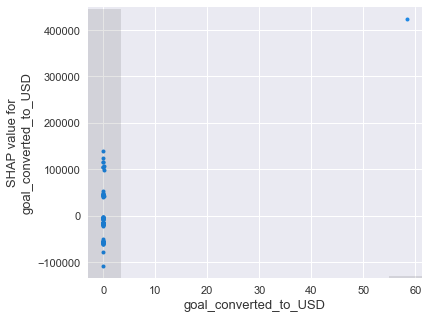

In [165]:
shap.plots.scatter(shap_values[:,"goal_converted_to_USD"])

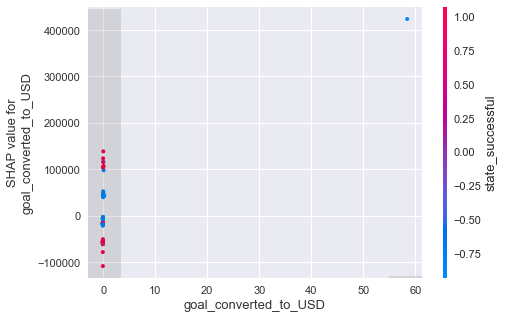

In [166]:
shap.plots.scatter(shap_values[:,"goal_converted_to_USD"], color=shap_values)

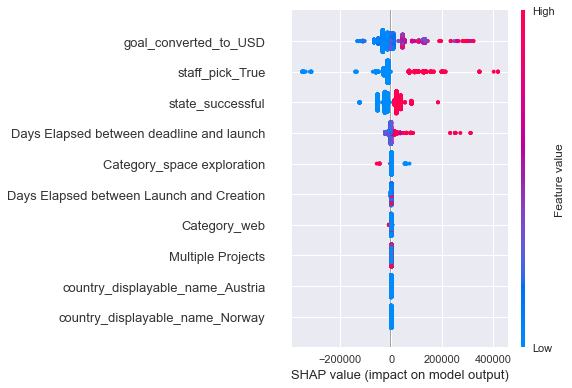

In [167]:
ex = shap.TreeExplainer(decisiontree_best)
shap_values = ex.shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, max_display=10)

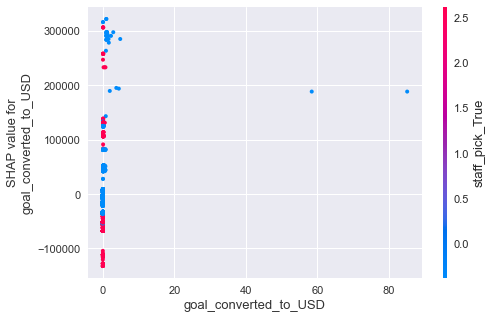

In [168]:
shap.dependence_plot("goal_converted_to_USD", shap_values, Xtest)

In [110]:
row2_values = train2_df.iloc[6]
row2_values

blurb                                                   20
name                                                     6
Multiple Projects                                     True
goal_converted_to_USD                          14084.02215
Days Elapsed between deadline and launch              31.0
Days Elapsed between Launch and Creation        108.780394
converted_pledged_amount                             44236
country_displayable_name_Austria                       0.0
country_displayable_name_Belgium                       0.0
country_displayable_name_Canada                        0.0
country_displayable_name_Denmark                       0.0
country_displayable_name_France                        0.0
country_displayable_name_Germany                       0.0
country_displayable_name_Greece                        0.0
country_displayable_name_Hong Kong                     0.0
country_displayable_name_Ireland                       0.0
country_displayable_name_Italy                         0

# Random Forest

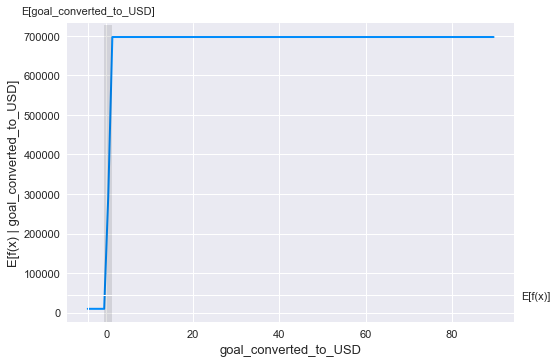

In [111]:
shap.partial_dependence_plot(
    "goal_converted_to_USD"
    , forest_best.predict
    , Xtrain
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
)

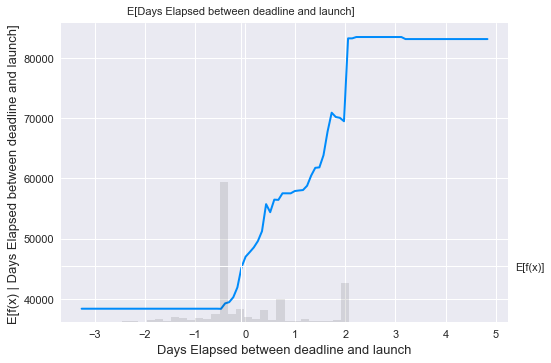

In [112]:
shap.partial_dependence_plot(
    "Days Elapsed between deadline and launch"
    , forest_best.predict
    , Xtrain
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
)

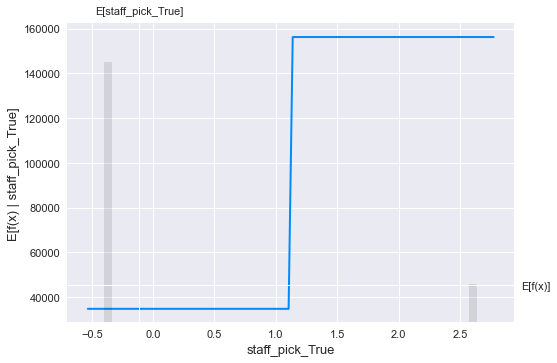

In [113]:
shap.partial_dependence_plot(
    "staff_pick_True"
    , forest_best.predict
    , Xtrain
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
)

In [269]:
X100 = shap.utils.sample(Xtest, 100)

In [270]:
explainer = shap.Explainer(forest_best.predict, X100)
shap_values = explainer(X100)

Permutation explainer: 101it [00:15,  2.40it/s]                         


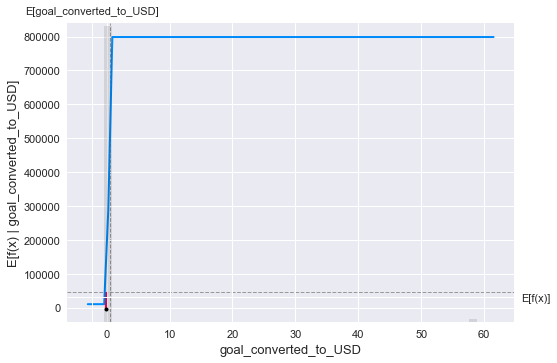

In [306]:
sample_index = 6
shap.partial_dependence_plot(
    "goal_converted_to_USD"
    , forest_best.predict
    , X100
    , ice=False
    , model_expected_value=True
    , feature_expected_value=True
    , shap_values=shap_values[sample_index:sample_index+1,:]
)

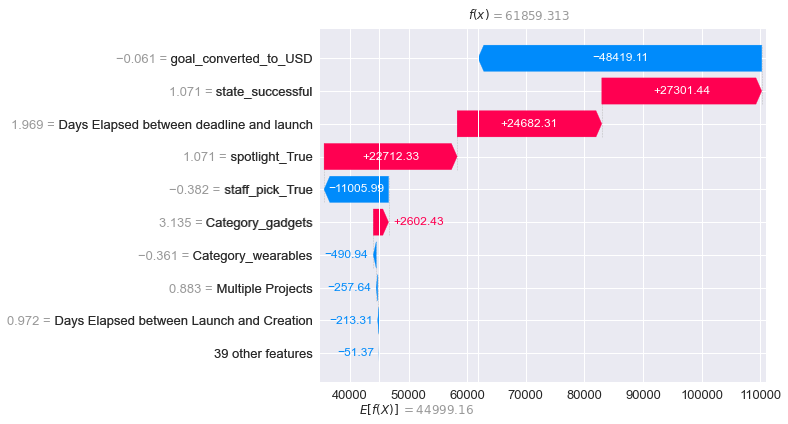

In [307]:
shap.plots.waterfall(shap_values[sample_index], max_display=10)

In [308]:
shap.plots.force(shap_values[sample_index])

In [309]:
test_values_sample_5 = X100.iloc[sample_index]
test_values_sample_5

blurb                                         -0.830696
name                                           1.029542
Multiple Projects                              0.882504
goal_converted_to_USD                         -0.060667
Days Elapsed between deadline and launch       1.968664
Days Elapsed between Launch and Creation       0.971678
country_displayable_name_Austria              -0.081183
country_displayable_name_Belgium              -0.064157
country_displayable_name_Canada                4.124847
country_displayable_name_Denmark              -0.085004
country_displayable_name_France               -0.170824
country_displayable_name_Germany              -0.198062
country_displayable_name_Greece               -0.026147
country_displayable_name_Hong Kong            -0.193674
country_displayable_name_Ireland              -0.063708
country_displayable_name_Italy                -0.152854
country_displayable_name_Japan                -0.086017
country_displayable_name_Luxembourg           -0

In [310]:

# 1. Extract the standardized values from `X100` at index 5
standardized_values_sample_5 = X100.iloc[sample_index]

# 2. Inverse transform the standardized values to the original scale
original_values_sample_5 = scaler.inverse_transform([standardized_values_sample_5])

# 3. Convert the NumPy array back to a DataFrame with column names
original_df_sample_5 = pd.DataFrame(original_values_sample_5, columns=Xtest.columns)
original_df_sample_5

,blurb,name,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,...,Category_gadgets,Category_hardware,Category_makerspaces,Category_robots,Category_software,Category_sound,Category_space exploration,Category_wearables,Category_web,state_successful
0,13.0,9.0,1.0,7926.1473,59.958333,206.60228,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [311]:
single_row_values = original_df_sample_5.iloc[0]

In [312]:
single_row_values["goal_converted_to_USD"]

7926.147299999997

In [313]:
single_row_values["staff_pick_True"]

0.0

In [314]:
single_row_values["spotlight_True"]

1.0

In [325]:
single_row_values["state_successful"]

1.0

In [318]:
single_row_values["Days Elapsed between deadline and launch"]

59.95833333332848

In [319]:
goal_converted = single_row_values["goal_converted_to_USD"]
staff_pick = single_row_values["staff_pick_True"]
spotlight = single_row_values["spotlight_True"]
days_elapsed = single_row_values["Days Elapsed between deadline and launch"]

# Create a DataFrame
data = {
    "Goal (USD)": [goal_converted],
    "Staff Pick": [staff_pick],
    "Spotlight": [spotlight],
    "Days Elapsed": [days_elapsed]
}

table_df = pd.DataFrame(data)

# Display the table
print(table_df)

   Goal (USD)  Staff Pick  Spotlight  Days Elapsed
0   7926.1473         0.0        1.0     59.958333


In [320]:
explainer = shap.Explainer(decisiontree_best.predict, X100)
shap_values = explainer(X100)

In [321]:
sample_index = 6

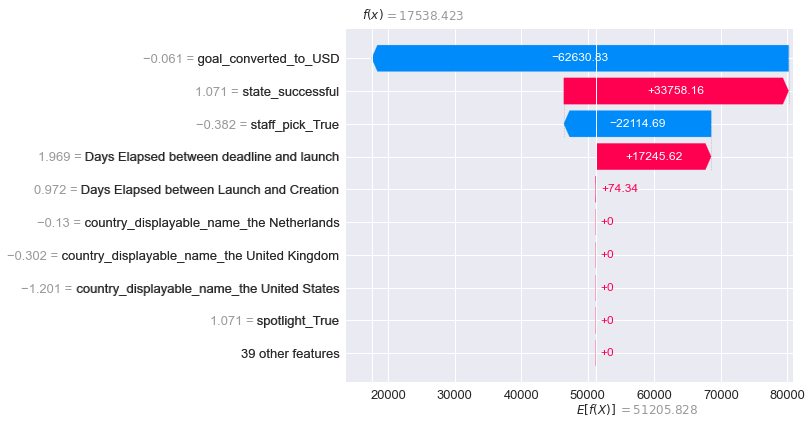

In [322]:
shap.plots.waterfall(shap_values[sample_index], max_display=10)

In [323]:
shap.plots.force(shap_values[sample_index])

In [324]:

# 1. Extract the standardized values from `X100` at index 5
standardized_values_sample_5 = X100.iloc[sample_index]

# 2. Inverse transform the standardized values to the original scale
original_values_sample_5 = scaler.inverse_transform([standardized_values_sample_5])

# 3. Convert the NumPy array back to a DataFrame with column names
original_df_sample_5 = pd.DataFrame(original_values_sample_5, columns=Xtest.columns)
original_df_sample_5

,blurb,name,Multiple Projects,goal_converted_to_USD,Days Elapsed between deadline and launch,Days Elapsed between Launch and Creation,country_displayable_name_Austria,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,...,Category_gadgets,Category_hardware,Category_makerspaces,Category_robots,Category_software,Category_sound,Category_space exploration,Category_wearables,Category_web,state_successful
0,13.0,9.0,1.0,7926.1473,59.958333,206.60228,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


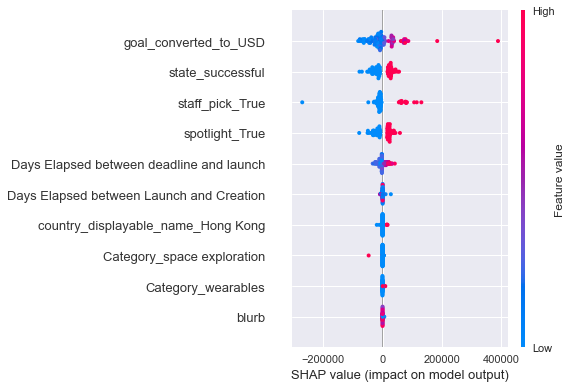

In [265]:
shap.summary_plot(shap_values, max_display=10, show=False)

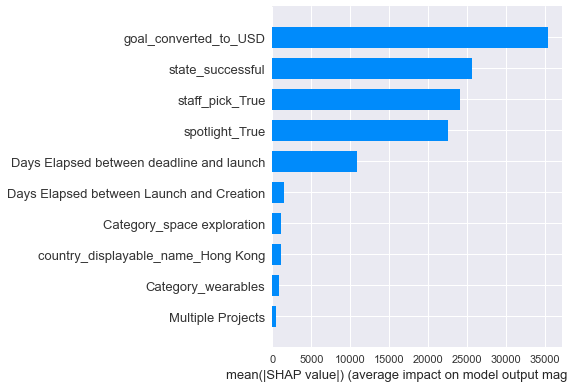

In [145]:
shap.summary_plot(shap_values, max_display=10, show=False, plot_type='bar')

In [146]:
feature_importance = pd.DataFrame({'name': X100.columns, 'importance': shap_values.abs.sum(0).values})
feature_importance= feature_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
feature_importance[feature_importance['importance']>0]

,name,importance
0,goal_converted_to_USD,3.536386e+06
1,state_successful,2.562384e+06
2,staff_pick_True,2.409594e+06
3,spotlight_True,2.255659e+06
4,Days Elapsed between deadline and launch,1.079405e+06
5,Days Elapsed between Launch and Creation,1.473052e+05
6,Category_space exploration,1.136523e+05
7,country_displayable_name_Hong Kong,1.097467e+05
8,Category_wearables,8.980512e+04
9,Multiple Projects,4.852853e+04


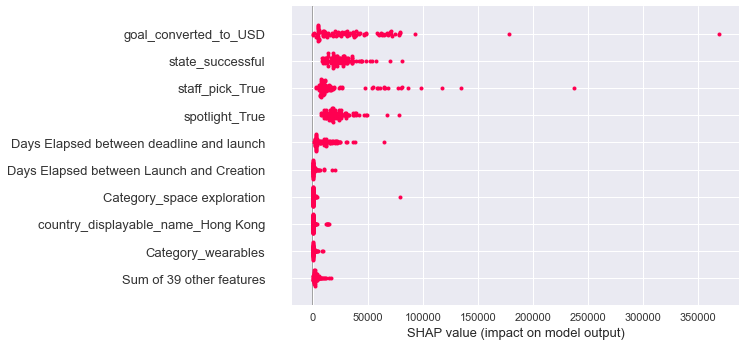

In [147]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

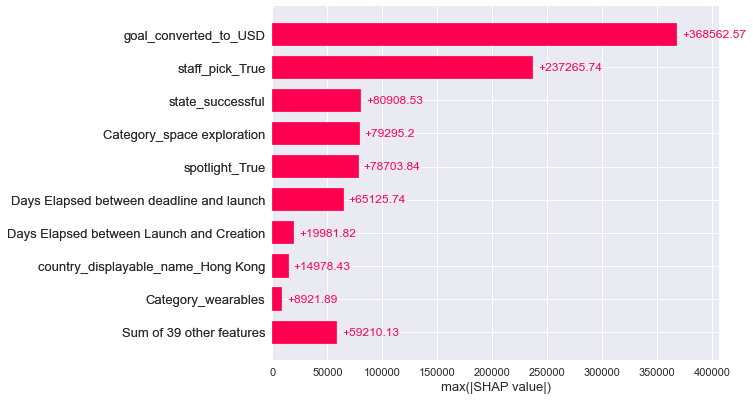

In [148]:
shap.plots.bar(shap_values.abs.max(0))

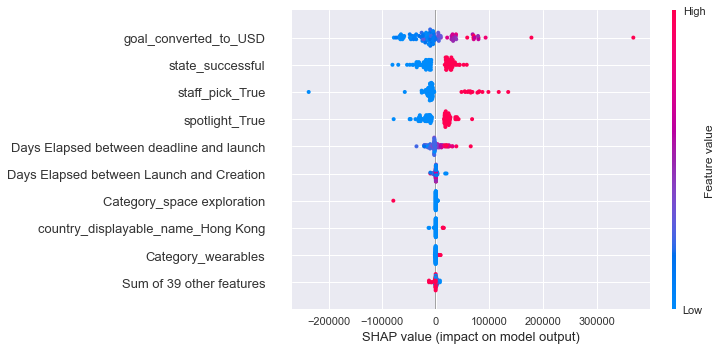

In [149]:
shap.plots.beeswarm(shap_values)

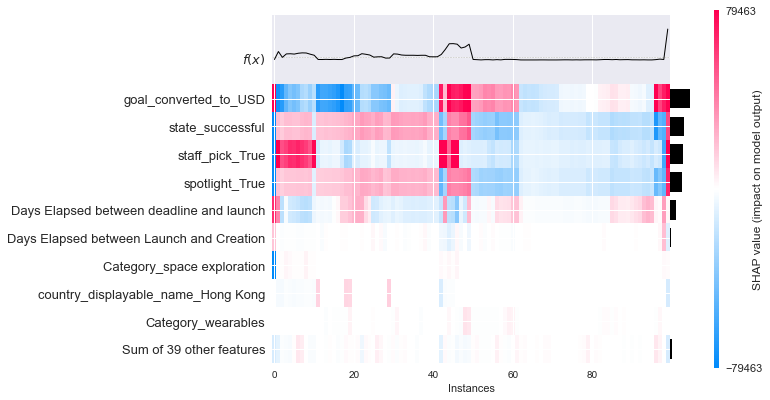

In [150]:
shap.plots.heatmap(shap_values[:1000])

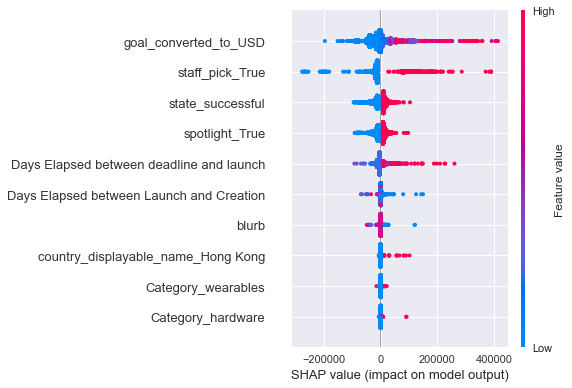

In [242]:
ex = shap.TreeExplainer(forest_best)
shap_values = ex.shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, max_display=10)

In [177]:
shap.initjs()

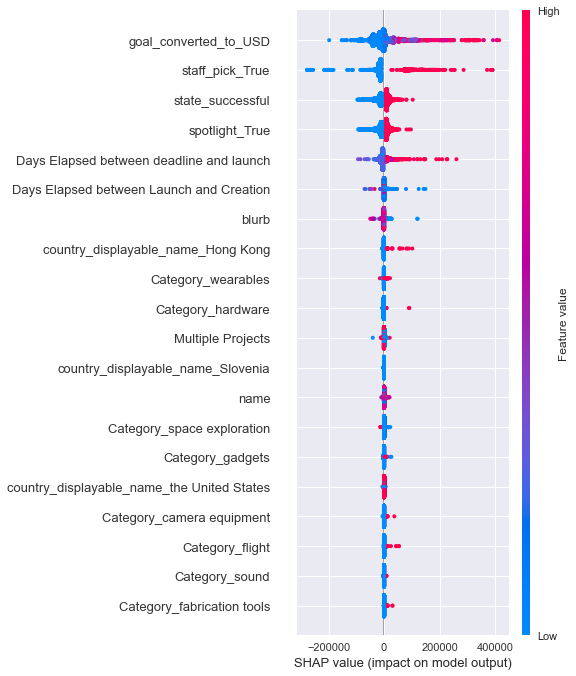

In [232]:
ex = shap.TreeExplainer(forestbest)
shap_values = ex.shap_values(Xtest)
shap.summary_plot(shap_values, Xtest)